## Exploratory Data Analysis (EDA) mini project: Employee Attrition

---
**Objective:**
The primary goal of this project is to conduct a comprehensive analysis of the employee attrition dataset to uncover insights,
patterns, and relationships that contribute to employee turnover. The aim is to identify key factors and potential predictors that lead to
employees leaving the organization, enabling a deeper understanding of the underlying causes of attrition. This analysis will provide actionable insights to help address and mitigate the employee turnover

---

**How to use this Template**:

This template notebook will aid you in devising your overall solution. Each section/step will contain the following:

- Pre-written code for loading the libraries
- Pre-written comments for performing certain tasks
- Section for recording your observations and inferences

We hope the above guided instructions will enable you further in your thought process while completing this mini-project.

 ***Note*** : The instructions mentioned here are for starter purposes only to get you thinking in the right direction. **You can build on top of this, and do as much as additional analyses as you want**

**Steps:**
1. Reading dataset.
 data cleaning, handling missing values.
2. Univariate analysis for Categorical and numerical features.
3. Bivariate and multivariate analysis
4. Using probability distributions
5. Exploring auto-EDA libraries
6. Summary
7. Future work
---

## Step 1 : Reading dataset, data cleaning, handling missing values

In [19]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import scipy.stats as stats


### **Accessing the dataset**
To access the dataset, open the Folder where the employee_attributes.csv is located and load it into google colab


In [20]:
# First, load the CSV files into dataframes using pandas.
# Type your code below.
from google.colab import files
uploaded = files.upload()


Saving employee_attrition.csv to employee_attrition (1).csv


In [21]:
# Read the Dataset
employee_attrition_df = pd.read_csv('employee_attrition.csv')

In [22]:
#print the dataset
employee_attrition_df
#print the first 5 rows of the dataset
employee_attrition_df.head()


ID  Age  Gender   Education Level Marital Status  Number of Dependents  \
0  71481   23  Female  Bachelors degree        Married                     2   
1  70258   23    Male       High school         Single                     1   
2   7426   40    Male  Associate Degree        Married                     0   
3  34743   35    Male    Masters degree        Married                     0   
4  36725   41    Male    Masters degree         Single                     2   

   Months at Company    Industry  Monthly Income Work-Life Balance  \
0                 13   Education            4788              Poor   
1                 27  Technology            9773              High   
2                 42  Healthcare            9374              High   
3                 34  Technology           17292              Poor   
4                  2     Finance            4660              Fair   

  Job Satisfaction  Number of Promotions Overtime Job Level Company Size  \
0              Low                     1       No     Entry        Small   
1        Very High                     0       No       Mid        Small   
2        Very High                     0       No    Senior       Medium   
3              Low                     0       No       Mid       Medium   
4           Medium                     0       No     Entry        Small   

   Total experience Remote Work Leadership Opportunities Company Reputation  \
0                25         Yes                      NaN               Good   
1                41         Yes                      NaN               Good   
2                65          No                      NaN               Fair   
3                93         Yes                      NaN               Good   
4                 8         Yes                      NaN               Good   

  Attrition  
0      Left  
1      Left  
2      Left  
3      Left  
4      Left

In [23]:
#print the last 5 rows of the dataset
employee_attrition_df.tail()

ID  Age  Gender   Education Level Marital Status  \
24995  45090   19  Female  Associate Degree         Single   
24996  11220   47  Female    Masters degree        Married   
24997  34929   27  Female    Masters degree       Divorced   
24998  51802   46  Female  Bachelors degree        Married   
24999  60908   25    Male  Bachelors degree        Married   

       Number of Dependents  Months at Company    Industry  Monthly Income  \
24995                     2                  1       Media            5058   
24996                     0                  9     Finance            5796   
24997                     3                 24   Education            5912   
24998                     0                 31       Media           12255   
24999                     0                  6  Healthcare            9303   

      Work-Life Balance Job Satisfaction  Number of Promotions Overtime  \
24995              Poor              Low                     0       No   
24996              Poor              Low                     0       No   
24997              Poor              Low                     1       No   
24998              Fair           Medium                     0       No   
24999         Very High             High                     0       No   

      Job Level Company Size  Total experience Remote Work  \
24995     Entry        Small                 9          No   
24996     Entry        Large                15          No   
24997       Mid       Medium                39          No   
24998       Mid        Small                81         Yes   
24999       Mid       Medium                52         Yes   

      Leadership Opportunities Company Reputation Attrition  
24995                      NaN               Good    Stayed  
24996                      Yes               Fair    Stayed  
24997                      NaN               Good    Stayed  
24998                      NaN               Fair    Stayed  
24999                      NaN               Good    Stayed

#### **Understanding the Dataset**
We have included some additional information below to help you understand better.

This employee attrition dataset contains employee records for the employees who left/stayed with the organization and various other features


| **Feature Name**             | **Description**                                                                                           |
|------------------------------|-----------------------------------------------------------------------------------------------------------|
| **ID**               | A unique identifier assigned to each employee.                                                            |
| **Age**                       | The age of the employee, ranging from 18 to 60 years.                                                     |
| **Gender**                    | The gender of the employee(Male/Female)                                                                               |
| **Education Level**           | The highest education level attained/pursued by the employee: (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD) |
| **Marital Status**            | The marital status of the employee: (Divorced, Married, Single)                                           |
| **Number of Dependants**            | The Number of children employee has : (0-6)                                           |
| **Months at Company**         | The number of months the employee has been working at the company.                                        |
| **Monthly Income**            | The monthly salary of the employee, in dollars.                                                           |
| **Industry**                  | The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media. |
| **Work-Life Balance**         | The employee's perceived balance between work and personal life, (Poor, Below Average, Good, Excellent)   |
| **Job Satisfaction**          | The employee's satisfaction with their job: (Very Low, Low, Medium, High)                                 |
| **Number of Promotions**      | The total number of promotions the employee has received.                                                 |
| **Overtime**                  | Whether the person did overtime or not |
| **Job Level**                 | The job level of the employee: (Entry, Mid, Senior)                                                       |
| **Company Size**              | The size of the company the employee works for: (Small, Medium, Large)                                    |
| **Total Experience**          | The total number of months the employee has been working in the industry.                                 |
| **Remote Work**               | Whether the employee works remotely: (Yes or No)                                                          |
| **Leadership Opportunities**  | Whether the employee has leadership opportunities: (Yes or No)                                            |
| **Company Reputation**        | The employee's perception of the company's reputation: (Very Poor, Poor, Good, Excellent)                 |
| **Attrition**                 | Whether the employee has left the company. Values are Stayed or Left.                                     |





In [24]:
employee_attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        25000 non-null  int64 
 1   Age                       25000 non-null  int64 
 2   Gender                    25000 non-null  object
 3   Education Level           24707 non-null  object
 4   Marital Status            25000 non-null  object
 5   Number of Dependents      25000 non-null  int64 
 6   Months at Company         25000 non-null  int64 
 7   Industry                  25000 non-null  object
 8   Monthly Income            25000 non-null  int64 
 9   Work-Life Balance         25000 non-null  object
 10  Job Satisfaction          25000 non-null  object
 11  Number of Promotions      25000 non-null  int64 
 12  Overtime                  25000 non-null  object
 13  Job Level                 25000 non-null  object
 14  Company Size          

The below Attributes/Columns are Numeric in nature for the Employee_attrition_dataset
1. ID
2. Age
3. Number of Depemdants
4. Months at the Company
5. Monthly Income
6. Number of Promotions
7. Total Experience

The below Attributes/Columns are Categoraical in nature for the Employee_attrition_dataset
1. Gender                    
2. Education Level   (293 missing values)         
3. Marital Status            
4. Industry                  
5. Work-Life Balance         
6. Job Satisfaction          
7. Overtime                  
8. Job Level                 
9. Company Size              
10.Remote Work               
11.Leadership Opportunities (21,820 missing Values)
12.Company Reputation        
13.Attrition                 

In [25]:
# Check the dataframe information  columns, rows, nulls, daya types (Hint : It is a single method)
rows, cols = employee_attrition_df.shape
print({"Rows": rows, "Columns": cols})

{'Rows': 25000, 'Columns': 20}


In [26]:
## Read the first few values of the dataset
#print the first 5 rows of the dataset
employee_attrition_df.head()

ID  Age  Gender   Education Level Marital Status  Number of Dependents  \
0  71481   23  Female  Bachelors degree        Married                     2   
1  70258   23    Male       High school         Single                     1   
2   7426   40    Male  Associate Degree        Married                     0   
3  34743   35    Male    Masters degree        Married                     0   
4  36725   41    Male    Masters degree         Single                     2   

   Months at Company    Industry  Monthly Income Work-Life Balance  \
0                 13   Education            4788              Poor   
1                 27  Technology            9773              High   
2                 42  Healthcare            9374              High   
3                 34  Technology           17292              Poor   
4                  2     Finance            4660              Fair   

  Job Satisfaction  Number of Promotions Overtime Job Level Company Size  \
0              Low                     1       No     Entry        Small   
1        Very High                     0       No       Mid        Small   
2        Very High                     0       No    Senior       Medium   
3              Low                     0       No       Mid       Medium   
4           Medium                     0       No     Entry        Small   

   Total experience Remote Work Leadership Opportunities Company Reputation  \
0                25         Yes                      NaN               Good   
1                41         Yes                      NaN               Good   
2                65          No                      NaN               Fair   
3                93         Yes                      NaN               Good   
4                 8         Yes                      NaN               Good   

  Attrition  
0      Left  
1      Left  
2      Left  
3      Left  
4      Left

In [ ]:
## Read the last  few values of the dataset
#print the last 5 rows of the dataset
employee_attrition_df.tail()

ID  Age  Gender   Education Level Marital Status  \
24995  45090   19  Female  Associate Degree         Single   
24996  11220   47  Female    Masters degree        Married   
24997  34929   27  Female    Masters degree       Divorced   
24998  51802   46  Female  Bachelors degree        Married   
24999  60908   25    Male  Bachelors degree        Married   

       Number of Dependents  Months at Company    Industry  Monthly Income  \
24995                     2                  1       Media            5058   
24996                     0                  9     Finance            5796   
24997                     3                 24   Education            5912   
24998                     0                 31       Media           12255   
24999                     0                  6  Healthcare            9303   

      Work-Life Balance Job Satisfaction  Number of Promotions Overtime  \
24995              Poor              Low                     0       No   
24996              Poor              Low                     0       No   
24997              Poor              Low                     1       No   
24998              Fair           Medium                     0       No   
24999         Very High             High                     0       No   

      Job Level Company Size  Total experience Remote Work  \
24995     Entry        Small                 9          No   
24996     Entry        Large                15          No   
24997       Mid       Medium                39          No   
24998       Mid        Small                81         Yes   
24999       Mid       Medium                52         Yes   

      Leadership Opportunities Company Reputation Attrition  
24995                      NaN               Good    Stayed  
24996                      Yes               Fair    Stayed  
24997                      NaN               Good    Stayed  
24998                      NaN               Fair    Stayed  
24999                      NaN               Good    Stayed

In [27]:
# Generate summary statistics for numerical columns in the dataframe.
employee_attrition_df.describe()

ID           Age  Number of Dependents  Months at Company  \
count  25000.000000  25000.000000          25000.000000       25000.000000   
mean   37158.809080     38.757200              1.840000          26.300520   
std    21515.402487     11.957577              1.500003          21.494681   
min        3.000000     18.000000              0.000000           1.000000   
25%    18497.000000     29.000000              1.000000           9.000000   
50%    37228.500000     39.000000              2.000000          21.000000   
75%    55952.250000     49.000000              3.000000          39.000000   
max    74497.000000     59.000000              6.000000         120.000000   

       Monthly Income  Number of Promotions  Total experience  
count    25000.000000          25000.000000      25000.000000  
mean      9681.227760              0.476760         52.634680  
std       3125.775771              0.754164         26.796078  
min       2374.000000              0.000000          1.000000  
25%       7326.000000              0.000000         31.000000  
50%       9443.500000              0.000000         52.000000  
75%      11726.000000              1.000000         74.000000  
max      21221.000000              4.000000        126.000000

In [28]:
#Number of unique counts
employee_attrition_df.nunique()

ID                          25000
Age                            42
Gender                          2
Education Level                 7
Marital Status                  3
Number of Dependents            7
Months at Company             117
Industry                        5
Monthly Income              10641
Work-Life Balance               4
Job Satisfaction                4
Number of Promotions            5
Overtime                        1
Job Level                       3
Company Size                    3
Total experience              126
Remote Work                     2
Leadership Opportunities        2
Company Reputation              4
Attrition                       2
dtype: int64

In [29]:
# Write your code here
#employee_attrition_df.isna().sum()
employee_attrition_df.isnull().sum()

ID                              0
Age                             0
Gender                          0
Education Level               293
Marital Status                  0
Number of Dependents            0
Months at Company               0
Industry                        0
Monthly Income                  0
Work-Life Balance               0
Job Satisfaction                0
Number of Promotions            0
Overtime                        0
Job Level                       0
Company Size                    0
Total experience                0
Remote Work                     0
Leadership Opportunities    21820
Company Reputation              0
Attrition                       0
dtype: int64

**Observations**

*Document your observations for the analysis done till now around missing values, data types, columns*

**Observation 1** - Numerical Data Types
The below Attributes/Columns are Numeric in nature for the Employee_attrition_dataset

ID,
Age,
Number of Dependants,
Months at the Company,
Monthly Income,
Number of Promotions,
Total Experience


**Observation 2** - Categorical Data Types
The below Attributes/Columns are Categorical in nature for the Employee_attrition_dataset

Gender,
Education Level (293 missing values),
Marital Status,
Industry,
Work-Life Balance,
Job Satisfaction,
Overtime,
Job Level,
Company Size,
Remote Work,
Leadership Opportunities (21,820 missing Values),
Company Reputation,
Attrition

**Observation 3** -
out of 20 Attributes/Columns we have only 2 Attributes having missing values that being Education Level and Leadership Oppourtunities

**Observation 4** -
Age
The Maximum Age of the Employee in this dataset is 59 Year old
The Minimum Age of the Employee in this dataset is 18 Year old
Median age is 39 Years and The eman is about 38.7572 .. very close to Median, this attribute looks Good , No Outliers

**Observation 5** -
Number of Dependants
Maximum is 6 meaning Big Family , Minimum is 0 - No Family/dependants Yet

**Observation 6** -
Months at Company
Maximum is 120 months menaing - 10 Years,
Minimum is 1 month - 30 days (not sure whats wrong , curious to Know about the Employees who was there only for 1 month)

**Observation 7** -
Total Experience
Maximum is 126
Minimum is 1




In [30]:
employee_attrition_df.value_counts('Attrition')

Attrition
Left      12500
Stayed    12500
Name: count, dtype: int64

The values are Balanced between the Employees who Stayed and Employees who Left the value being 12500

#### Data cleaning: Checking for imbalance and values in various columns to understand if any typos or issues with values

In [31]:
# Check the attrition column for balance of values
## Since we are analyzing patterns in attrition, checking the value in this column is important
employee_attrition_df['Attrition'].value_counts()


Attrition
Left      12500
Stayed    12500
Name: count, dtype: int64

In [32]:
## Before cleaning data, trying to understand it better. Check the value count for each categorical feature.
for column in employee_attrition_df.columns:
    # Check if the column is categorical by setting the expected datatype of column to object
    if employee_attrition_df[column].dtype == 'object':
        print(f"Value counts for column '{column}':")
        print(employee_attrition_df[column].value_counts())
        print("\n")


Value counts for column 'Gender':
Gender
Male      13584
Female    11416
Name: count, dtype: int64


Value counts for column 'Education Level':
Education Level
Bachelors degree     9158
Masters degree       6308
Associate Degree     3384
High school          3361
PhD                  1873
bachelor's degree     447
PHD                   176
Name: count, dtype: int64


Value counts for column 'Marital Status':
Marital Status
Married     12445
Single       8884
Divorced     3671
Name: count, dtype: int64


Value counts for column 'Industry':
Industry
Technology    7250
Education     5000
Media         5000
Finance       4000
Healthcare    3750
Name: count, dtype: int64


Value counts for column 'Work-Life Balance':
Work-Life Balance
Fair         6899
Poor         6860
High         5768
Very High    5473
Name: count, dtype: int64


Value counts for column 'Job Satisfaction':
Job Satisfaction
Medium       6838
Low          6798
Very High    5724
High         5640
Name: count, dtype: int64



**Analysis Hint**
-  Make sure you observe the Education column properly, carefully observe number of eduation levels
-  Look at value distribution of overtime column/feature and look whether it's required
-  Also make a note of all the features/column that are uncessary for the required analysis


In [33]:
# Replace variations in the 'Education Level' column with consistent labels to ensure uniformity across the data e.g of Inconsistency (e.g., "bachelor's degree" vs "Bachelors degree")
employee_attrition_df['Education Level'].value_counts()
employee_attrition_df['Education Level']=employee_attrition_df['Education Level'].replace("bachelor's degree", "Bachelors degree")
employee_attrition_df['Education Level']=employee_attrition_df['Education Level'].replace("PhD", "PHD")
#employee_attrition_df['Education Level'].loc[employee_attrition_df['Education Level'] == "bachelor's degree"] = "Bachelors degree"



In [34]:
## Checking the count for eduation level after correct mapping
employee_attrition_df['Education Level'].value_counts()


Education Level
Bachelors degree    9605
Masters degree      6308
Associate Degree    3384
High school         3361
PHD                 2049
Name: count, dtype: int64

#### Handling missing values and Dropping Irrelevant Columns  

In [35]:
## Check the count of rows with nulls
employee_attrition_df.isnull().sum()

ID                              0
Age                             0
Gender                          0
Education Level               293
Marital Status                  0
Number of Dependents            0
Months at Company               0
Industry                        0
Monthly Income                  0
Work-Life Balance               0
Job Satisfaction                0
Number of Promotions            0
Overtime                        0
Job Level                       0
Company Size                    0
Total experience                0
Remote Work                     0
Leadership Opportunities    21820
Company Reputation              0
Attrition                       0
dtype: int64

In [36]:
### Checking the proportion or percentage of missing values
employee_attrition_df.isnull().sum()/len(employee_attrition_df)*100

ID                           0.000
Age                          0.000
Gender                       0.000
Education Level              1.172
Marital Status               0.000
Number of Dependents         0.000
Months at Company            0.000
Industry                     0.000
Monthly Income               0.000
Work-Life Balance            0.000
Job Satisfaction             0.000
Number of Promotions         0.000
Overtime                     0.000
Job Level                    0.000
Company Size                 0.000
Total experience             0.000
Remote Work                  0.000
Leadership Opportunities    87.280
Company Reputation           0.000
Attrition                    0.000
dtype: float64

 Analysis Hint :

 - If number of misssing values is very high >25% then you should consider dropping the column
 - If number of missing values is less thant 5% then you should consider dropping rows with missing values or imputing them

In [37]:
## Drop all the columns with high missing value % and that are unncessary for the analysis
employee_attrition_df['Leadership Opportunities'].value_counts()
#dropping the Leadership column as missing values is greater than 25%
employee_attrition_df.drop('Leadership Opportunities', axis=1, inplace=True)


In [38]:
## Check if the columns were dropped
employee_attrition_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    25000 non-null  int64 
 1   Age                   25000 non-null  int64 
 2   Gender                25000 non-null  object
 3   Education Level       24707 non-null  object
 4   Marital Status        25000 non-null  object
 5   Number of Dependents  25000 non-null  int64 
 6   Months at Company     25000 non-null  int64 
 7   Industry              25000 non-null  object
 8   Monthly Income        25000 non-null  int64 
 9   Work-Life Balance     25000 non-null  object
 10  Job Satisfaction      25000 non-null  object
 11  Number of Promotions  25000 non-null  int64 
 12  Overtime              25000 non-null  object
 13  Job Level             25000 non-null  object
 14  Company Size          25000 non-null  object
 15  Total experience      25000 non-null

In [39]:
## Drop the rows with missing values
#Overtime Column has only 1 value for all the 25000 rows, hence dropping it makes sense
employee_attrition_df.drop('Overtime', axis=1, inplace=True)


In [40]:
## Check if the missing values were dropped
employee_attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    25000 non-null  int64 
 1   Age                   25000 non-null  int64 
 2   Gender                25000 non-null  object
 3   Education Level       24707 non-null  object
 4   Marital Status        25000 non-null  object
 5   Number of Dependents  25000 non-null  int64 
 6   Months at Company     25000 non-null  int64 
 7   Industry              25000 non-null  object
 8   Monthly Income        25000 non-null  int64 
 9   Work-Life Balance     25000 non-null  object
 10  Job Satisfaction      25000 non-null  object
 11  Number of Promotions  25000 non-null  int64 
 12  Job Level             25000 non-null  object
 13  Company Size          25000 non-null  object
 14  Total experience      25000 non-null  int64 
 15  Remote Work           25000 non-null

*After the above, you can do additional data cleaning steps as well if you feel anything important needs to be added*

**Once the data looks good for EDA, we can start with univariate, bivariate and multivariate analysis and get some insights about how features contribute towards attrition.**

In [42]:
#Imputing Education Level
employee_attrition_df['Education Level'].value_counts()
if employee_attrition_df['Education Level'].isnull().any():
    employee_attrition_df['Education Level'].fillna('Unknown', inplace=True)

In [43]:
employee_attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    25000 non-null  int64 
 1   Age                   25000 non-null  int64 
 2   Gender                25000 non-null  object
 3   Education Level       25000 non-null  object
 4   Marital Status        25000 non-null  object
 5   Number of Dependents  25000 non-null  int64 
 6   Months at Company     25000 non-null  int64 
 7   Industry              25000 non-null  object
 8   Monthly Income        25000 non-null  int64 
 9   Work-Life Balance     25000 non-null  object
 10  Job Satisfaction      25000 non-null  object
 11  Number of Promotions  25000 non-null  int64 
 12  Job Level             25000 non-null  object
 13  Company Size          25000 non-null  object
 14  Total experience      25000 non-null  int64 
 15  Remote Work           25000 non-null

In [44]:
employee_attrition_df['Education Level'].value_counts()

Education Level
Bachelors degree    9605
Masters degree      6308
Associate Degree    3384
High school         3361
PHD                 2049
Unknown              293
Name: count, dtype: int64

## **Step 2: Univariate - Categorical and numerical features analysis**

**Note** - The instructions given below are to get you started and help you think in the right direction. You can build on top of it and do additional analyses as well.

### Analyze categorical features for the count for each value of a feature
1. What is the count of Male and Female employees?
2. What is the count of each marital status?
3. How many of them were working remotely and how many were not?
4. What is the count of values for each feature?


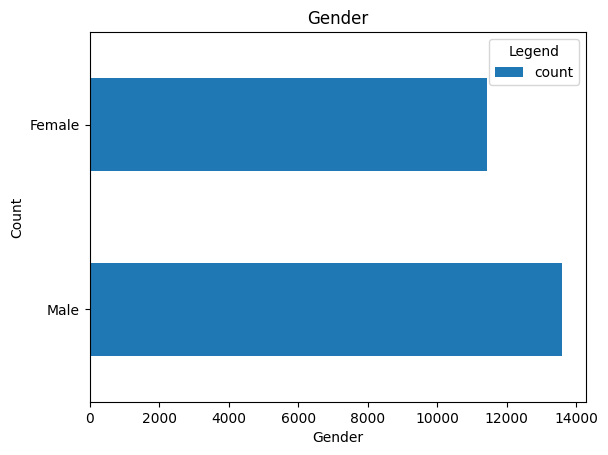

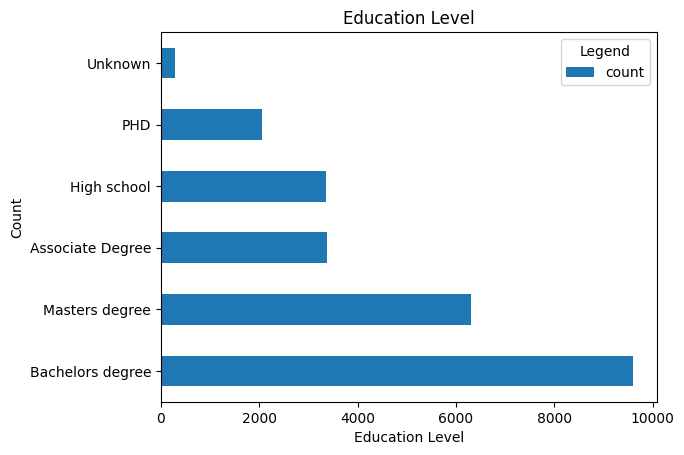

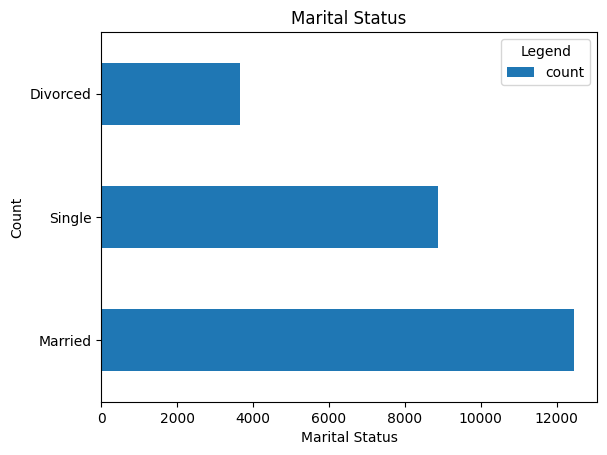

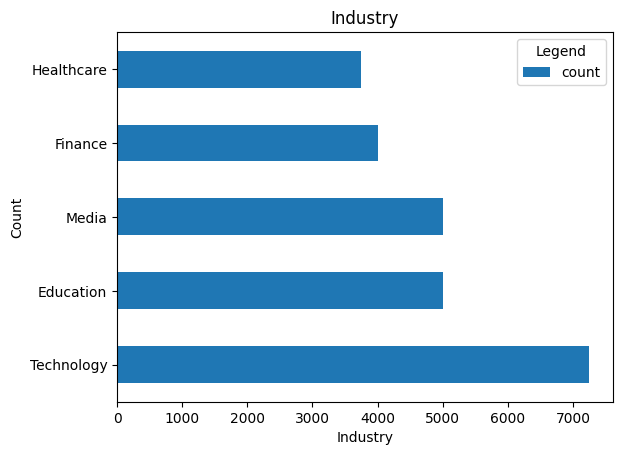

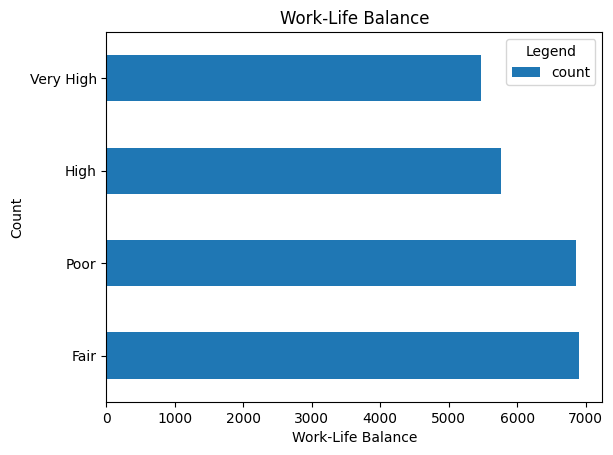

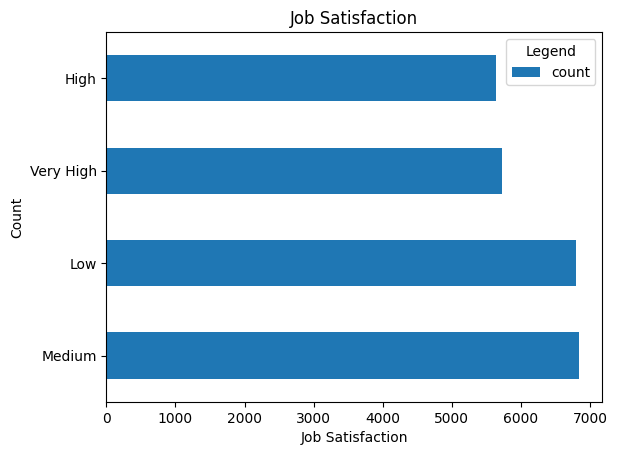

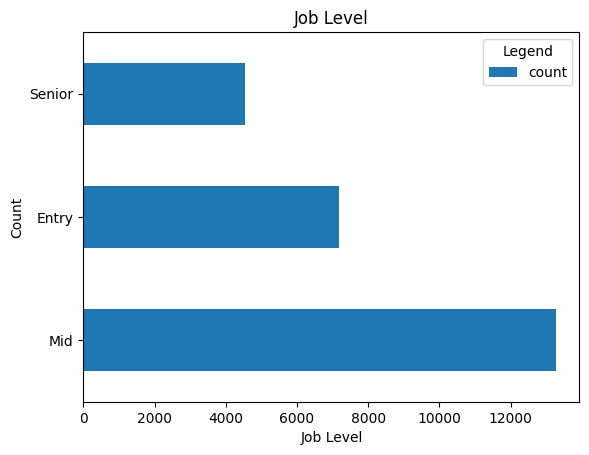

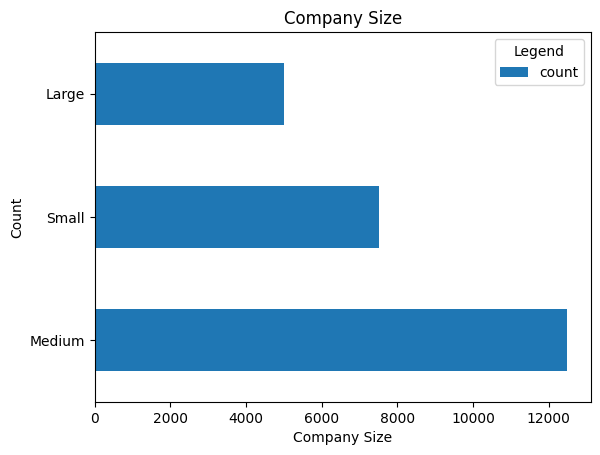

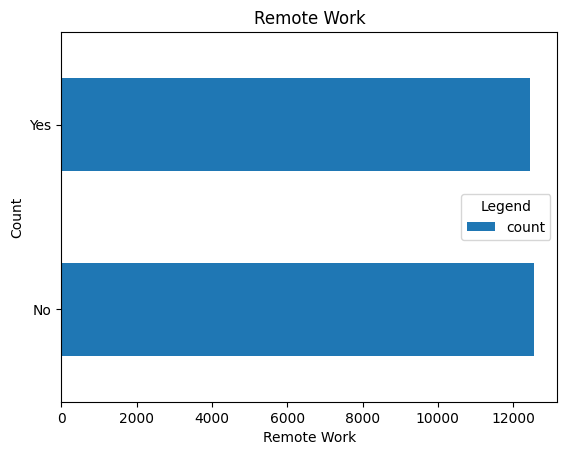

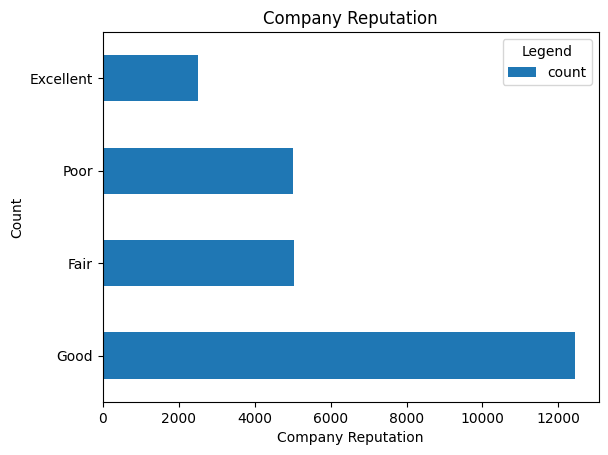

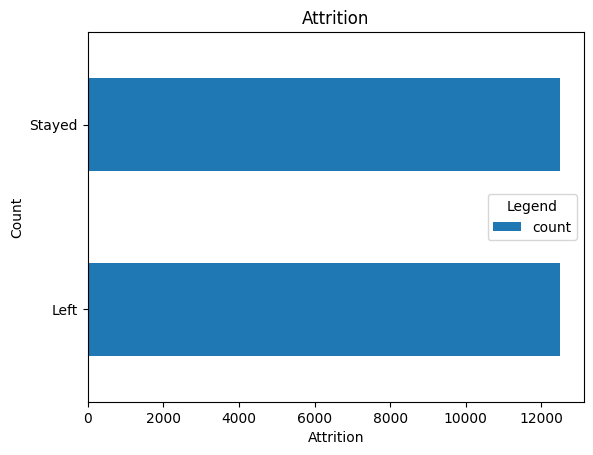

In [45]:
# Loop through each categorical feature in the dataframe and print the value counts in form of histogram
for column in employee_attrition_df.columns:
    # Check to ensure that column is categorical type
    if employee_attrition_df[column].dtype == 'object':
      employee_attrition_df[column].value_counts().plot(kind='barh')
      plt.xlabel(column)
      plt.ylabel('Count')
      plt.title(column)
#      for bar in employee_attrition_df[column].value_counts().plot(kind='barh'):
#        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
#             f'{int(bar.get_height())}', ha='center', va='bottom')
      plt.legend(title='Legend')
      plt.show()
    # write your code here

**Note Your Observations**

**Obervation - **
**Gender**- The number of Male(13584)Employees are MOre than Female(11416),
**Education Level** - Majority Employee's have done Bachelors Degree(9605) followed by Masters Degree(6308), Associate Degree (3384), High School(3361), PHD(2049) and unknown is (293),
**Marital Status** - Married(12445) Employees are comparatively more than Single(8884) and Divorced (3671),
Industry - Employees working in Technology (7250) are more than Media(5000) and Education(5000) , Finance(4000) , Healthcare(3750),
**Industry**
**Remote Work** - 12451 Employees were working remotely
and rest 12549 were working onsite.







### Analyze numerical features by plotting histogram with the count for values
1. Understand the distribution of Age, Months at company, Total experience, Salary, etc.

['Age', 'Number of Dependents', 'Months at Company', 'Monthly Income', 'Number of Promotions', 'Total experience']


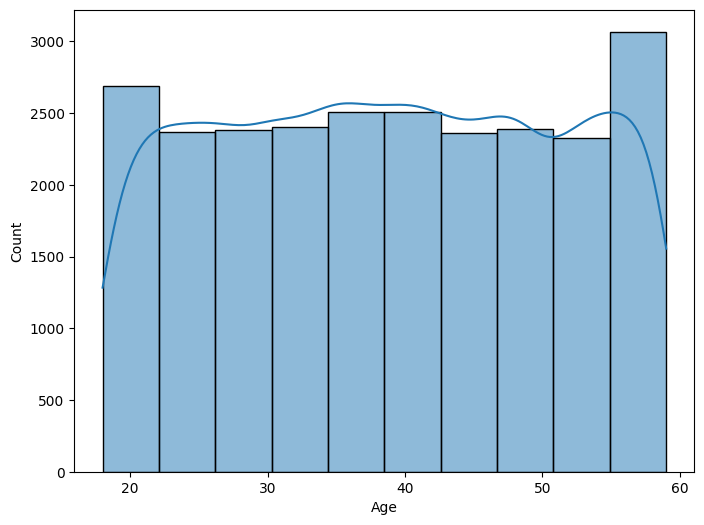

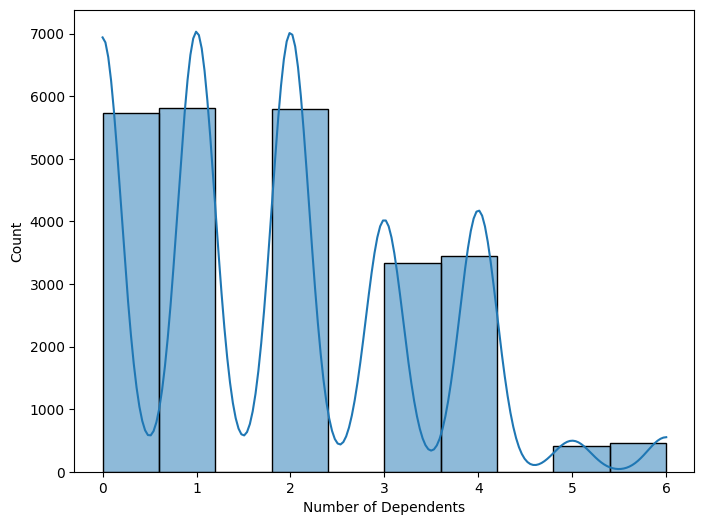

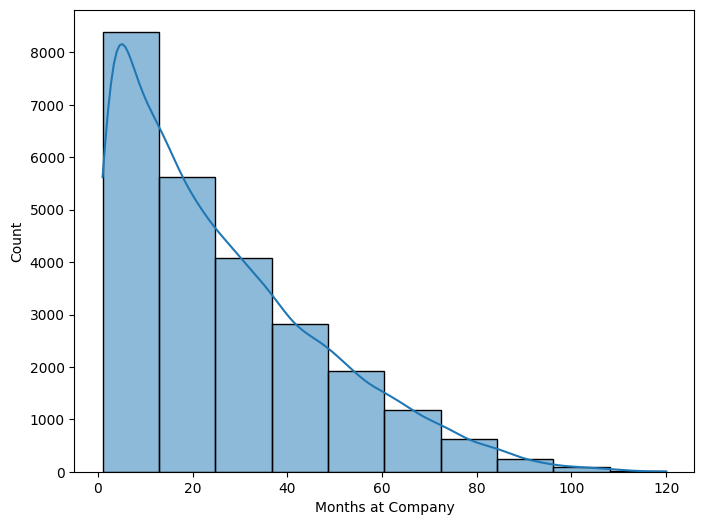

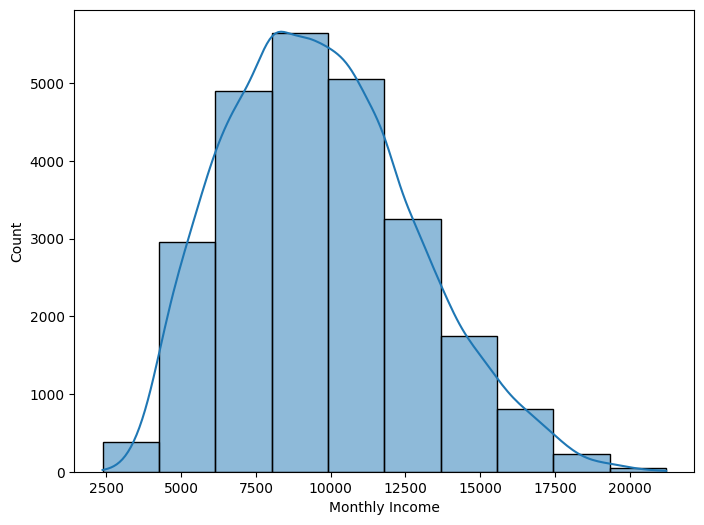

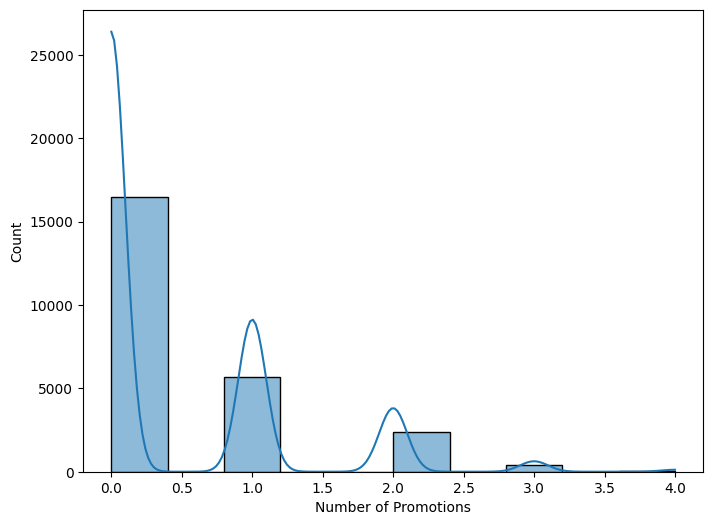

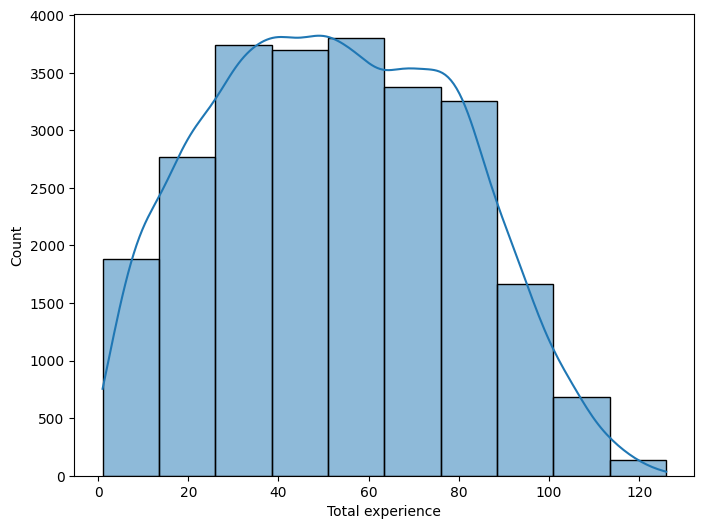

In [46]:
# List of numerical columns to analyze
numerical_columns = ['Age', 'Number of Dependents', 'Months at Company', 'Monthly Income', 'Number of Promotions', 'Total experience']
#for column in employee_attrition_df.columns:
#       if employee_attrition_df[column].dtype in [int, float]:
#          numerical_columns.append(column)
print (numerical_columns)
# Plot histograms with KDE= True  for numerial columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=employee_attrition_df, x=col, bins=10,kde=True)



In [47]:
employee_attrition_df['Number of Promotions'].value_counts()

Number of Promotions
0    16462
1     5694
2     2380
3      391
4       73
Name: count, dtype: int64

**Age:** - Is Equally distributed towards the Center - at 39
The Count of Age group 55 to 60 is High around 3000

**Number of Dependants** -
The Employee count for the Number of Dependents 0(5737),1(5814) and 2(5802) is more and equally distributed. The Employee  Count of Number of Dependents 3(3328) and 4 (3453) is mis range. We have less Employees having dependents 5(410) or 6(456).

**Months at Company** -  Looking at the distribution it Looks like right Skewed denoting that Majority of the Employees Spent less time/Months in the company.

**Monthly Income** - This looks almost a Normal Distribution(could be slightly rigth skewed) , Maximum Employees Having Monthly salary in the range of 7,500 to 12,500$.

**Number of Promotions** - This distribution looks Rigth Skewed as more Number of Employees got promotions closer to Zero, the count being 0(16462), 1(5694), 2(2380), 3(391), 4(73).

**Total experience** - This distribution looks like having 2 peaks one Between 40 and 50 months of experience and the other being 65 to 75 months of Experience making it look like a Bimodal distribution.








## Step 3: **Bivariate and multivariate analysis**

**Note** - The instructions given below are to get you started and help you think in the right direction. You can build on top of it and do additional analyses as well.

### Multivariate analysis: Checking correlation - Does the Monthly Income increase, as the Total Experience increases?

In [48]:
# Select only numeric columns for analyzing the numerical features.
numerical_columns = ['Age', 'Number of Dependents', 'Months at Company', 'Monthly Income', 'Number of Promotions', 'Total experience']
#for column in employee_attrition_df.columns:
#       if employee_attrition_df[column].dtype in [int, float]:
#          numerical_columns.append(column)
print (numerical_columns)

# Display the numeric dataframe using .head()
employee_attrition_df[numerical_columns].head()


['Age', 'Number of Dependents', 'Months at Company', 'Monthly Income', 'Number of Promotions', 'Total experience']


Age  Number of Dependents  Months at Company  Monthly Income  \
0   23                     2                 13            4788   
1   23                     1                 27            9773   
2   40                     0                 42            9374   
3   35                     0                 34           17292   
4   41                     2                  2            4660   

   Number of Promotions  Total experience  
0                     1                25  
1                     0                41  
2                     0                65  
3                     0                93  
4                     0                 8

                           Age  Number of Dependents  Months at Company  \
Age                   1.000000              0.238481           0.240647   
Number of Dependents  0.238481              1.000000           0.191890   
Months at Company     0.240647              0.191890           1.000000   
Monthly Income        0.332759              0.251279           0.518525   
Number of Promotions  0.097032              0.063544           0.376413   
Total experience      0.397584              0.303712           0.622605   

                      Monthly Income  Number of Promotions  Total experience  
Age                         0.332759              0.097032          0.397584  
Number of Dependents        0.251279              0.063544          0.303712  
Months at Company           0.518525              0.376413          0.622605  
Monthly Income              1.000000              0.205039          0.831503  
Number of Promotions        0.205039              1.000000          0.241584  


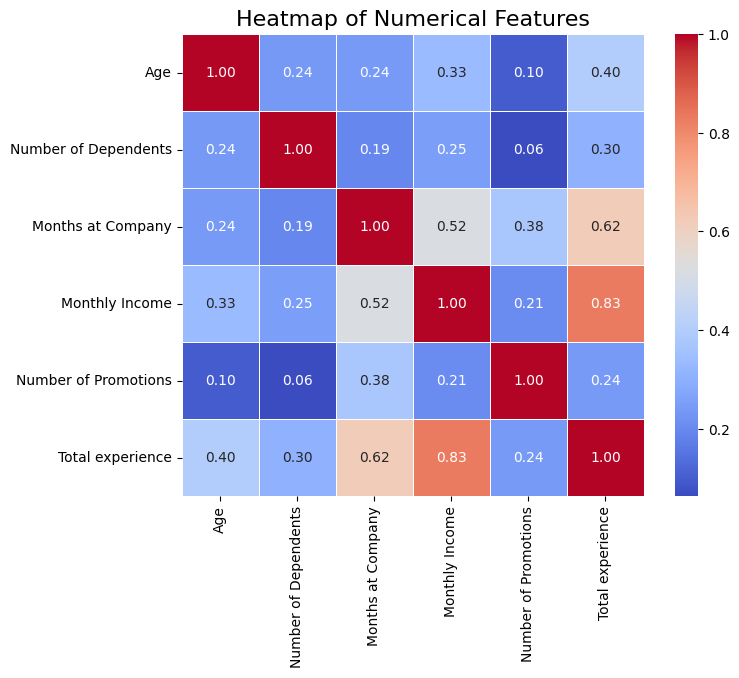

In [49]:
# Calculate correlation matrix to check if any of numerical features are highly correlated.
correlation_matrix = employee_attrition_df[numerical_columns].corr()
print(correlation_matrix)


# Plot the heatmap
# Create a new DataFrame with the selected features
numerical_data_selected = employee_attrition_df[numerical_columns]

# Compute the correlation matrix
correlation_matrix_map = numerical_data_selected.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_map, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)

# Add title to the heatmap
plt.title('Heatmap of Numerical Features', fontsize=16)

# Show the plot
plt.show()


**Note Your Observation:**
**Observation 1** - Total Experience and Monthly Income are high positive Correlated with 0.83 value showing More the Total Experience higher the Monthly Income.
Months at the Company and Total Experience also has high correlation with 0.62 Value showing that higher the Months at Company the more the Total Experience.






### Bivariate analysis: Age, gender, marital status, job role and job satisfaction.

1. Is the attrition more in Males compared to Females?
2. Who has more attrition among Single, Married and Divorced?
3. For what age the attrition is more?
4. Does work-life balance contribute to attrition?
5. Does job satisfaction contribute to attrition?

In [ ]:
# Create count plots to visualize the distribution of the 'Attrition' variable across different features:
# - Age: Understand how attrition varies with age.
# - Gender: Explore the relationship between gender and attrition.
# - Industry: Examine how attrition is distributed across different job roles (rotate x-axis labels for clarity).
# - Marital Status: Investigate the connection between marital status and attrition.
# - Job Satisfaction: Analyze the link between job satisfaction levels and attrition.


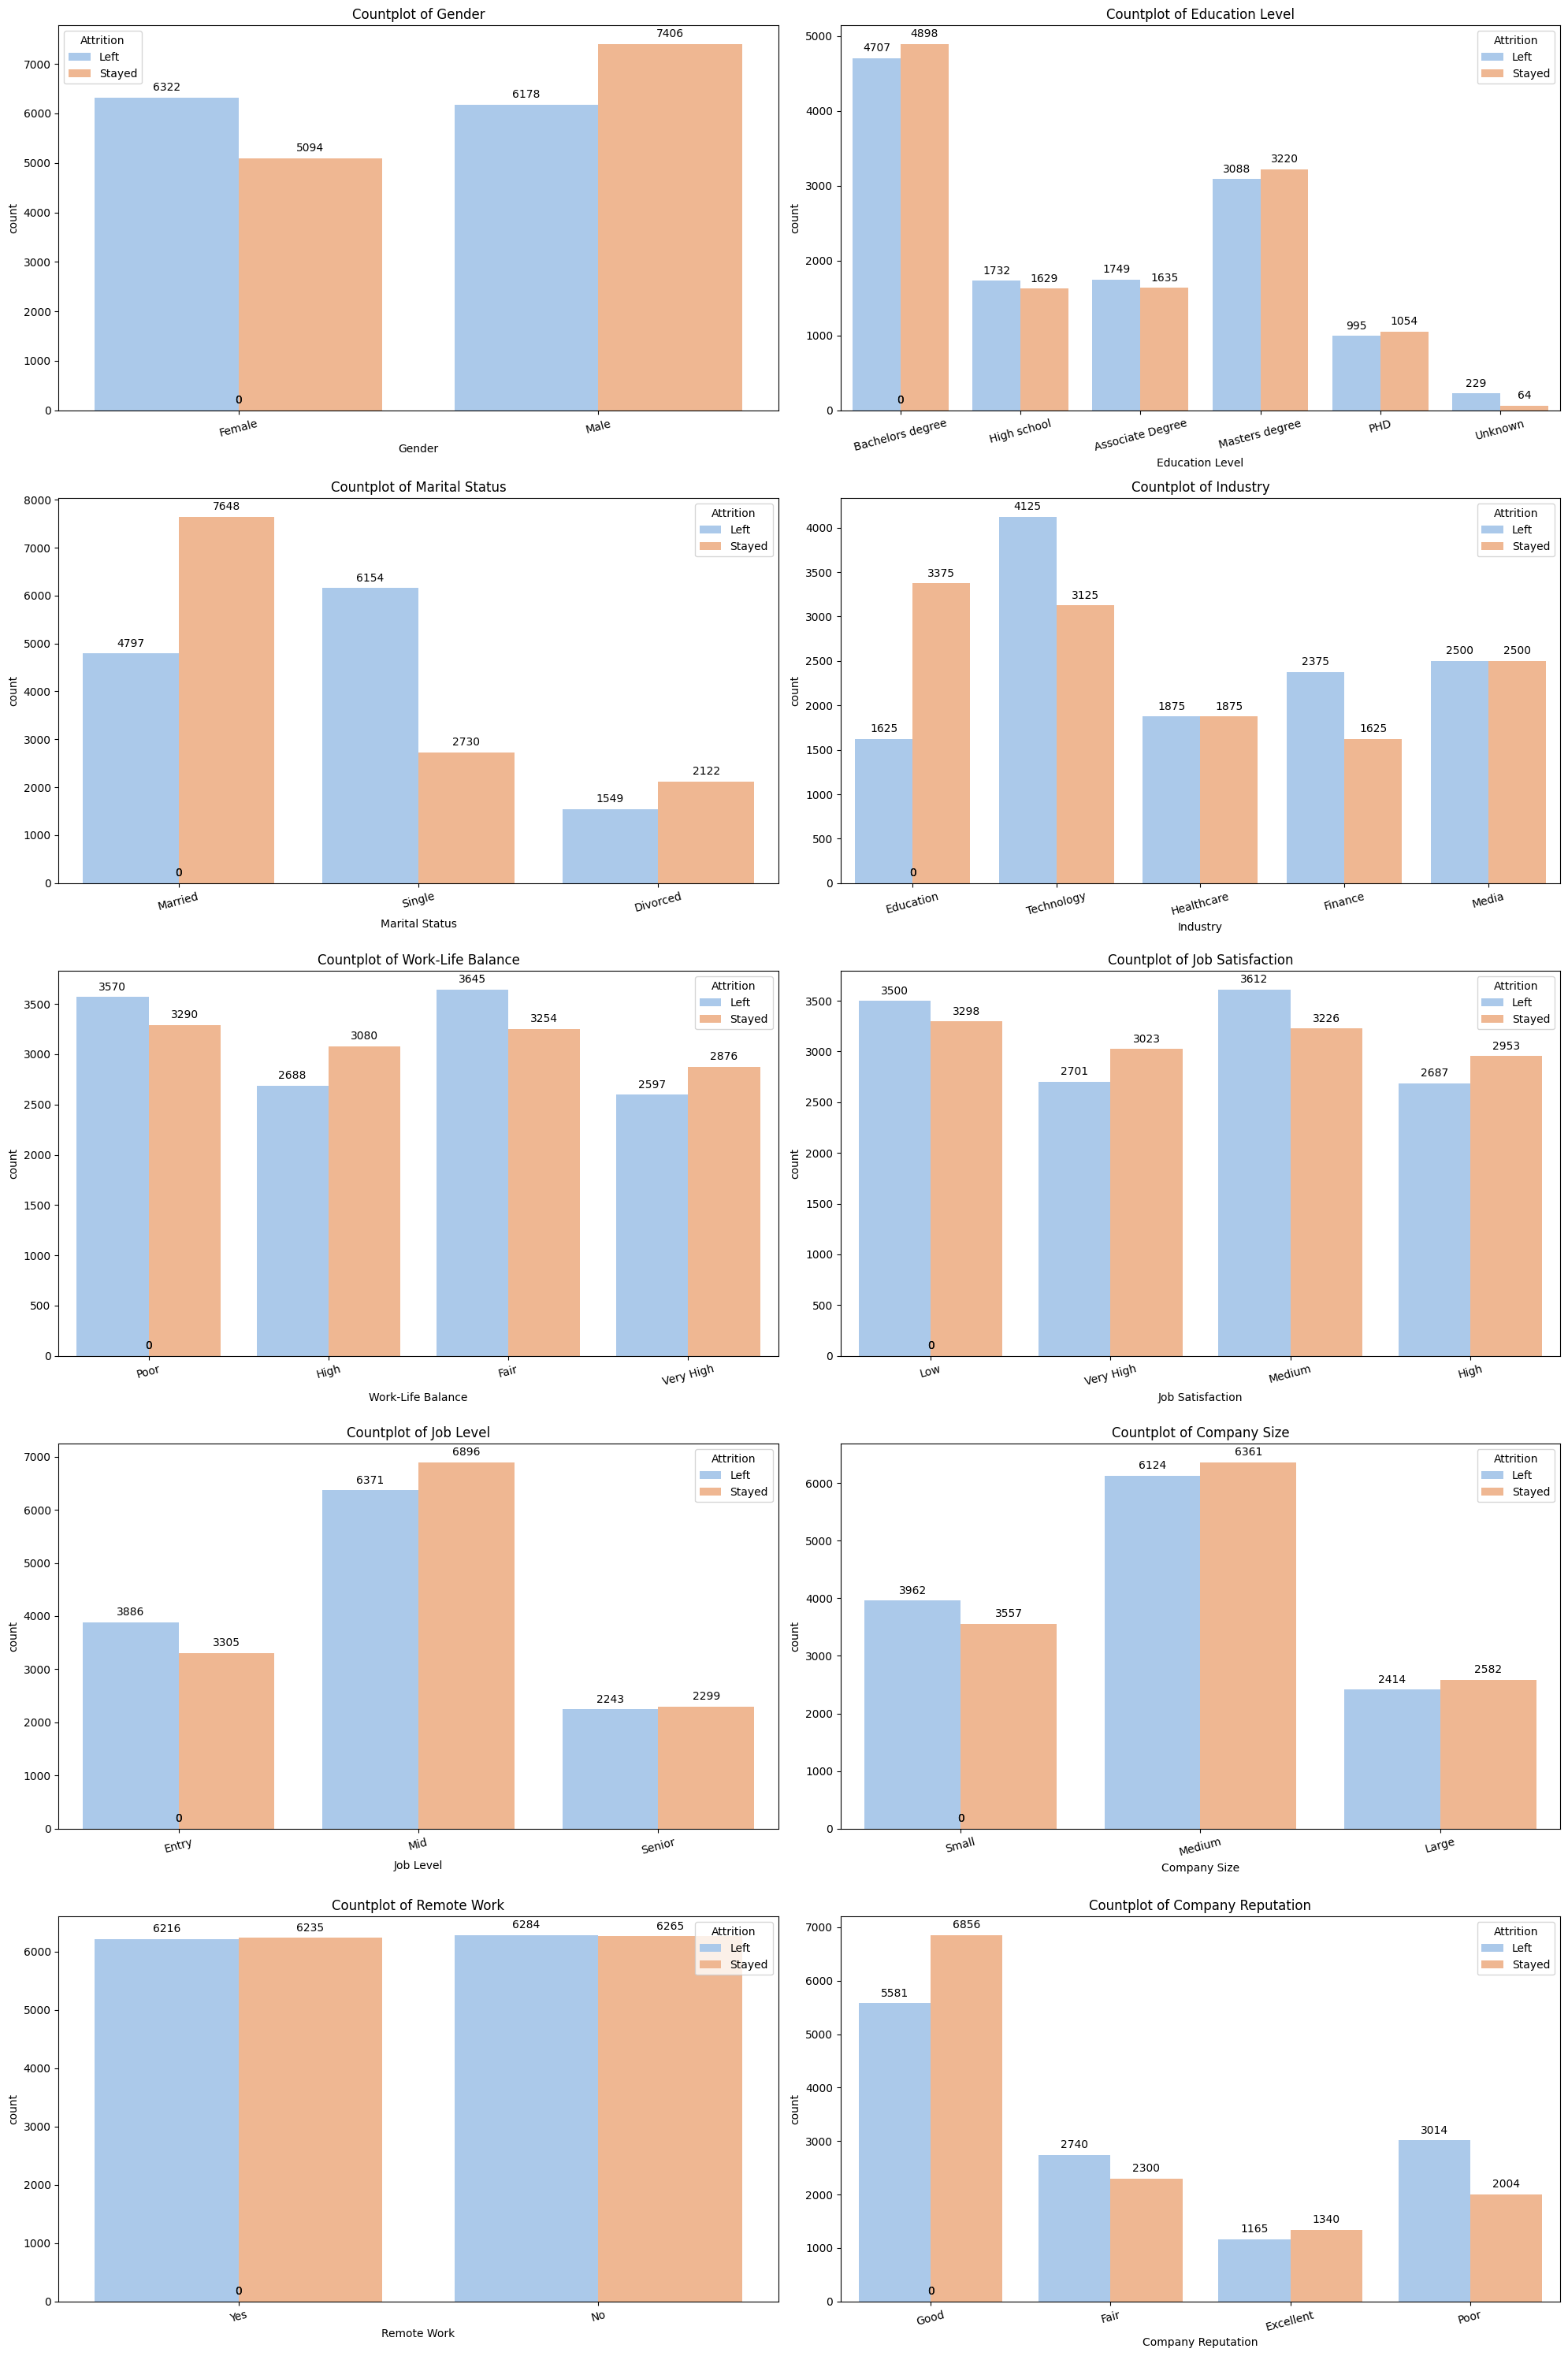

In [50]:

# Create count plots to visualize the distribution of the 'Attrition' variable across different features:

# List of categorical features to plot for the 'Attrition' Feature against different Features
#features = ['Gender','Industry','Marital Status','Job Satisfaction','Age','Work-Life Balance','Number of Dependents','Total experience','Months at Company','Monthly Income','Number of Promotions']
features = []
for feature in employee_attrition_df.columns:
    if employee_attrition_df[feature].dtype in ['object']:
      if feature not in ('Attrition'):
          features.append(feature)

# Calculate the number of rows and columns for subplots
num_features = len(features)
num_cols = 2  # Number of columns in the subplot grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create subplots with the calculated number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Iterate over the features and corresponding subplot axes
for i, feature in enumerate(features):
    sns.countplot(x=feature, data=employee_attrition_df, hue = 'Attrition', palette='pastel', ax=axes[i])


    # Add count labels on top of each bar
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 9),
                         textcoords='offset points', fontsize=10, color='black')

    # Set title for each subplot
    axes[i].set_title(f'Countplot of {feature}')
    #rotate the xticks for each subplot
    #axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=15)
    axes[i].tick_params(axis='x', rotation=15)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


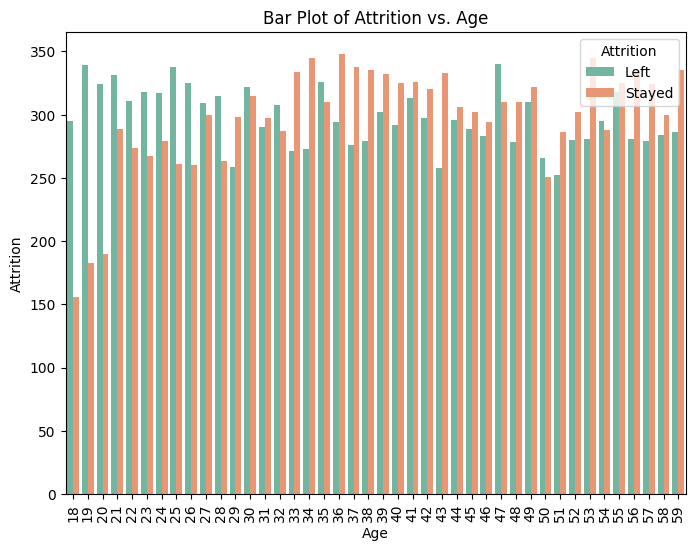

In [51]:
# Bar plot for - Age: Understand how attrition varies with age.
plt.figure(figsize=(8, 6))
sns.countplot(x='Age', hue='Attrition', data=employee_attrition_df, palette='Set2')
plt.title("Bar Plot of Attrition vs. Age")
plt.xlabel("Age")
plt.ylabel("Attrition")
plt.xticks(rotation=90)
plt.legend(title='Attrition')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    25000 non-null  int64 
 1   Age                   25000 non-null  int64 
 2   Gender                25000 non-null  object
 3   Education Level       25000 non-null  object
 4   Marital Status        25000 non-null  object
 5   Number of Dependents  25000 non-null  int64 
 6   Months at Company     25000 non-null  int64 
 7   Industry              25000 non-null  object
 8   Monthly Income        25000 non-null  int64 
 9   Work-Life Balance     25000 non-null  object
 10  Job Satisfaction      25000 non-null  object
 11  Number of Promotions  25000 non-null  int64 
 12  Job Level             25000 non-null  object
 13  Company Size          25000 non-null  object
 14  Total experience      25000 non-null  int64 
 15  Remote Work           25000 non-null

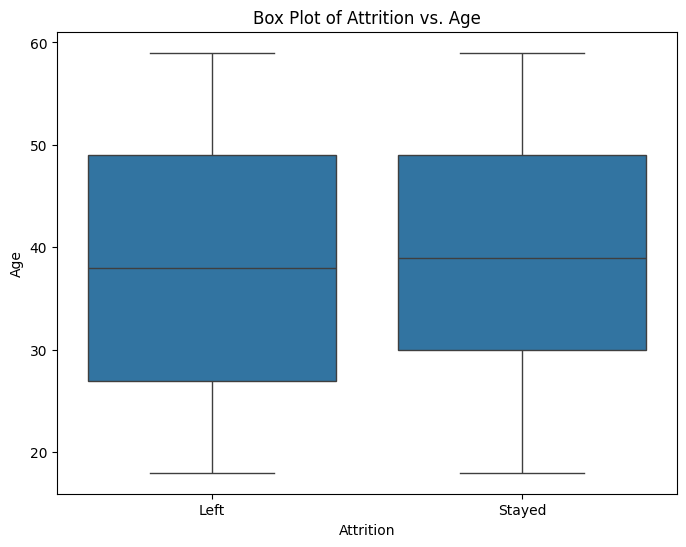

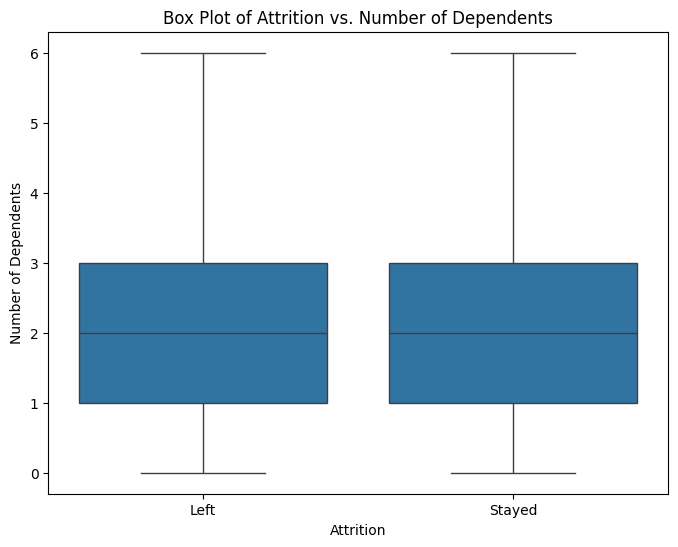

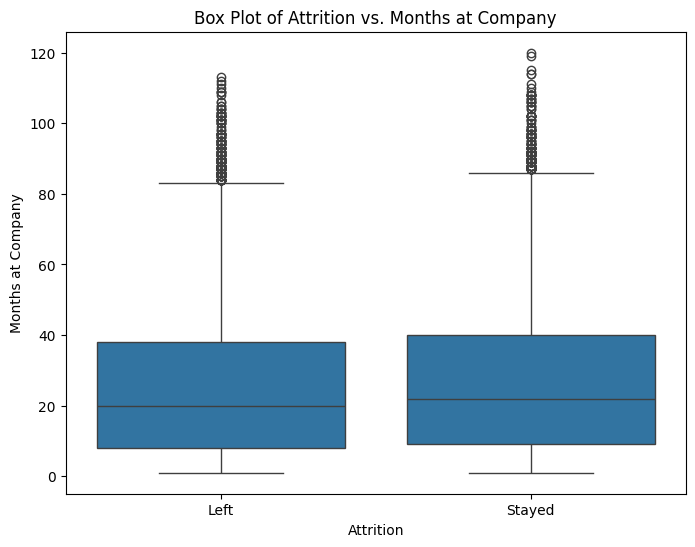

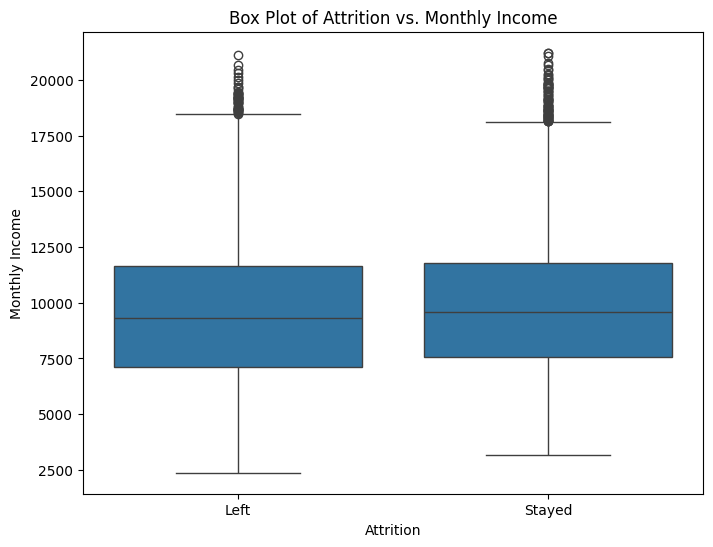

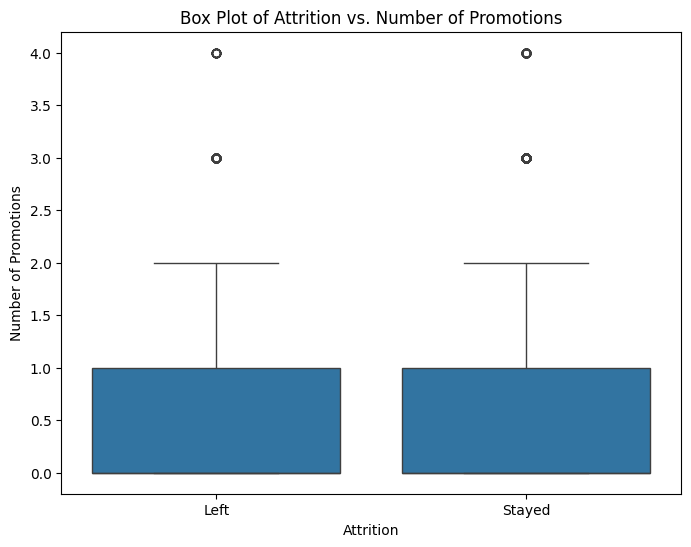

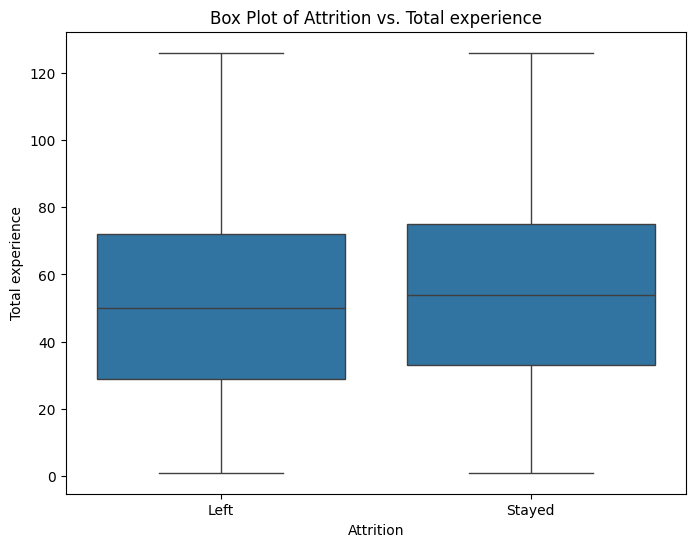

In [52]:
#Box Plot for Numerical Values
employee_attrition_df.info()
numerical_columns = ['Age', 'Number of Dependents', 'Months at Company','Monthly Income','Number of Promotions','Total experience']  # Modify this list based on your data
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Attrition', y=column, data=employee_attrition_df)
    plt.title(f"Box Plot of Attrition vs. {column}")
    plt.xlabel("Attrition")
    plt.ylabel(column)
    plt.show()



**Observation** -
**Age v/s Attrition** -
The plot suggests that age may not have a strong influence on attrition since the distribution is quite similar between the two groups, no outliers can be seen.
**Number of Dependents v/s Attrition** -
The Plot suggests that Numebr of Dependents also may not have a strong Influence the distribution is quite similar between the two groups.No outliers can be seen
**Months at the Company v/s Attrition** -
IQR for both Left and stayed is pretty much similar
The plot says that there are whiskers that Extend upto 80 at the top and upto 1 month at the bottom and there are many outliers beyond 80 months in both groups, indicating some employees have stayed well beyond the typical range. These outliers suggest that a small subset of employees stay much longer than the majority, regardless of whether they ultimately leave or stay.
**Monthly Income** -
IQR income for Employees who Left and stay are very Similar, this also show that we have Whiskers for both left and stayed somewhere around $18,000 and Outliers above that showing that some Employees are being paid more than the usual range but tis appear for Both Left and Stayed , hence this plot suggests monthly income levels are fairly consistent between employees who left and those who stayed, though we can Employees who left have less salary Compared to those who Stayed.





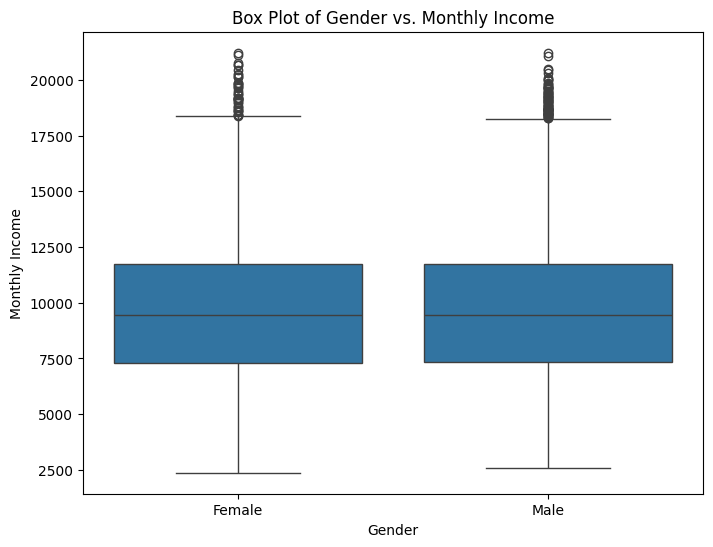

In [53]:
#Box Plot for Gender and Salary
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Monthly Income', data=employee_attrition_df)
plt.title("Box Plot of Gender vs. Monthly Income")
plt.xlabel("Gender")
plt.ylabel("Monthly Income")
plt.show()

### Bivariate analysis: numerical features - Using scatter plot to understand if the values for numerical features make logical sense?

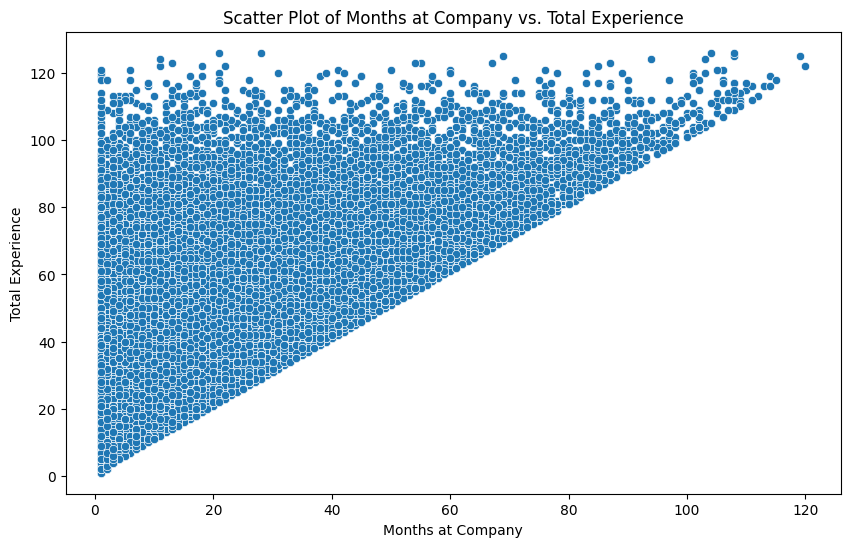

In [54]:
# Create a scatter plot to visualize the relationship between 'Months at Company' and 'Total Experience'.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Months at Company', y='Total experience', data=employee_attrition_df,legend='brief')
plt.title("Scatter Plot of Months at Company vs. Total Experience")
plt.xlabel("Months at Company")
plt.ylabel("Total Experience")
plt.show()



**Note Your Observation**
**Observation 1** - As the scatter Plot Points form an upward trend from left to right (slope up) it indicates a Strong Positive Correlation between "Months at the Company and "Total Experience.



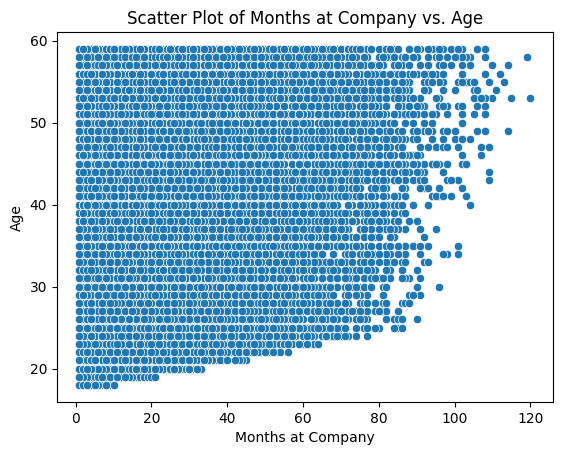

In [55]:
# scatter plot for "Months at Company" and Age
#plt.figure(figsize=(10, 6))
sns.scatterplot(x='Months at Company', y='Age', data=employee_attrition_df,legend='brief')
plt.title("Scatter Plot of Months at Company vs. Age")
plt.xlabel("Months at Company")
plt.ylabel("Age")
plt.show()


**Note Your Observation**
Key Observations:
Positive Relationship:

A large number of data points are concentrated in the lower-left area (young employees with short tenure).As the Age Increases beyond may be 25 the spread becomes more wider for Senior Employees who stayed more than 60 months.


Text(0, 0.5, 'Monthly Income')

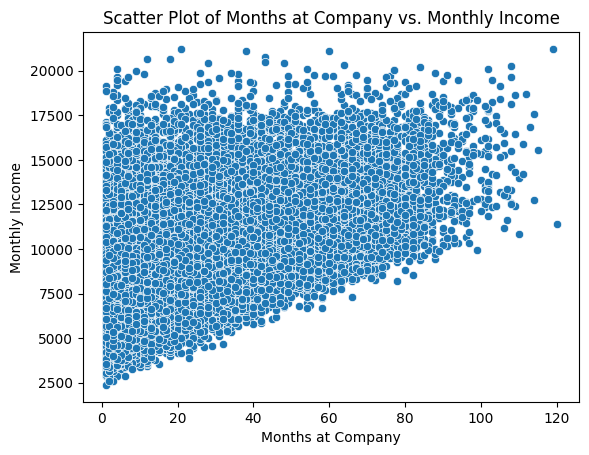

In [56]:
# scatter plot for "Months at Company" and Income
sns.scatterplot(x='Months at Company', y='Monthly Income', data=employee_attrition_df,legend='brief')
plt.title("Scatter Plot of Months at Company vs. Monthly Income")
plt.xlabel("Months at Company")
plt.ylabel("Monthly Income")



**Note Your Observation**
There appears to be a positive trend: as the number of months at the company increases, monthly income tends to rise.
The data points are densely packed, showing a gradual increase in income as tenure at the company grows.
There is a wide spread of income values at every tenure, indicating variability in income that might depend on other factors (e.g., job roles, departments).

Text(0, 0.5, 'Monthly Income')

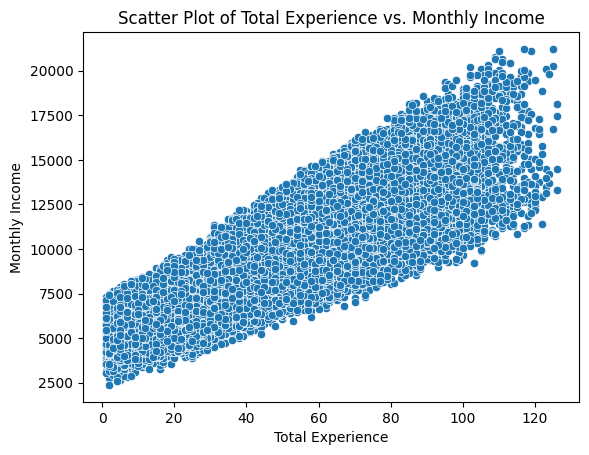

In [57]:
# scatter plot for Total experience and income
sns.scatterplot(x='Total experience', y='Monthly Income', data=employee_attrition_df,legend='brief')
plt.title("Scatter Plot of Total Experience vs. Monthly Income")
plt.xlabel("Total Experience")
plt.ylabel("Monthly Income")


**Total experience and income** - Looks like a Positive trend as Experience increase the Monthly Income Increases with few Outliers may be Because of the Job Type or Industry.

### Perform Label encoding for categorical columns

In [59]:
# Convert categorical variables to binary numeric values:
# - Attrition: Map 'Left' to 1 and 'Stayed' to 0.
Attrition = employee_attrition_df['Attrition'].replace({'Left': 1, 'Stayed': 0})   # Lable Encoding"""
employee_attrition_df['Attrition'] = Attrition

# - Gender: Map 'Male' to 1 and 'Female' to 0.
Gender = employee_attrition_df['Gender'].replace({'Male': 1, 'Female': 0})   # Lable Encoding"""
employee_attrition_df['Gender'] = Gender

# - Remote Work: Map 'Yes' to 1 and 'No' to 0.
Remote_Work = employee_attrition_df['Remote Work'].replace({'Yes': 1, 'No': 0})   # Lable Encoding"""
employee_attrition_df['Remote Work'] = Remote_Work
employee_attrition_df.head()
employee_attrition_df.tail()


ID  Age  Gender   Education Level Marital Status  \
24995  45090   19       0  Associate Degree         Single   
24996  11220   47       0    Masters degree        Married   
24997  34929   27       0    Masters degree       Divorced   
24998  51802   46       0  Bachelors degree        Married   
24999  60908   25       1  Bachelors degree        Married   

       Number of Dependents  Months at Company    Industry  Monthly Income  \
24995                     2                  1       Media            5058   
24996                     0                  9     Finance            5796   
24997                     3                 24   Education            5912   
24998                     0                 31       Media           12255   
24999                     0                  6  Healthcare            9303   

      Work-Life Balance Job Satisfaction  Number of Promotions Job Level  \
24995              Poor              Low                     0     Entry   
24996              Poor              Low                     0     Entry   
24997              Poor              Low                     1       Mid   
24998              Fair           Medium                     0       Mid   
24999         Very High             High                     0       Mid   

      Company Size  Total experience  Remote Work Company Reputation  \
24995        Small                 9            0               Good   
24996        Large                15            0               Fair   
24997       Medium                39            0               Good   
24998        Small                81            1               Fair   
24999       Medium                52            1               Good   

       Attrition  
24995          0  
24996          0  
24997          0  
24998          0  
24999          0

### Bivariate: Gender and attrition - What is attrition rate across Male and Female employees?

Gender
0    55.378416
1    45.479976
Name: Attrition, dtype: float64


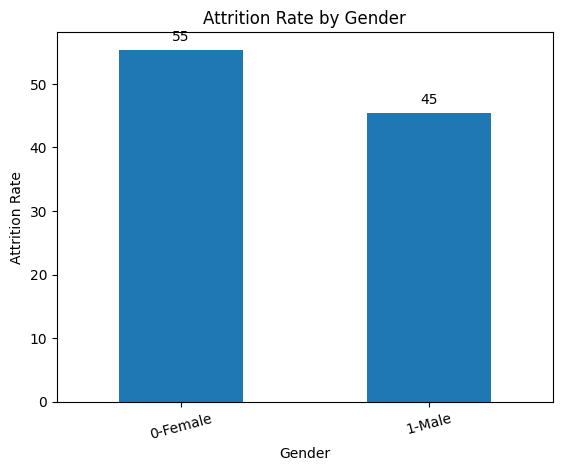

In [60]:
# Calculate the average attrition rate by gender and visualize it:
# - Group the data by 'Gender' and calculate the mean attrition rate for each group.
mean_attrition_rate_by_gender = employee_attrition_df.groupby('Gender')['Attrition'].mean()
mean_attrition_rate_by_gender = mean_attrition_rate_by_gender * 100
print(mean_attrition_rate_by_gender)

# - Plot a bar chart to compare attrition rates between females and males.
axes = mean_attrition_rate_by_gender.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Gender')
Gender = ['0-Female', '1-Male']
#plt.xticks(range(len(Gender)), Gender)
# Set custom text labels for the x-axis
plt.xticks(ticks=range(len(Gender)), labels=Gender)

# Add count labels on top of each bar
for p in axes.patches:
  axes.annotate(f'{int(p.get_height())}',
  (p.get_x() + p.get_width() / 2., p.get_height()),
  ha='center', va='center', xytext=(0, 9),
  textcoords='offset points', fontsize=10, color='black')

  #rotate the xticks for each subplot
  #axes.set_xticklabels(axes[i].get_xticklabels(), rotation=15)
  axes.tick_params(axis='x', rotation=15)

plt.show()

**The Attrition rate is Greater in Females(55.38%) than Males(45.48%)**
More Females tend to leave the company compared to Males based on Gender. Curious to find the reasons(Features affecting the decision for women to leave).

### Multivariate analysis: Attrition, Gender and age - What is the mean median age of Male and female employees when they stayed vs when they left?

In [61]:
# Calculate age statistics (mean, median, standard deviation) by gender:
# - Group the data by 'Gender' and compute the mean, median, and standard deviation of 'Age' for each group.
mean_age_by_gender = employee_attrition_df.groupby('Gender')['Age'].mean()
median_age_by_gender = employee_attrition_df.groupby('Gender')['Age'].median()
std_age_by_gender = employee_attrition_df.groupby('Gender')['Age'].std()
print(f"mean_age_by_gender:{mean_age_by_gender}")
print(f"median_age_by_gender:{median_age_by_gender}")
print(f"std_age_by_gender:{std_age_by_gender}")

# Analyze the effect of age on attrition:
# - Group the data by both 'Gender' and 'Attrition' to calculate age statistics (mean, median, standard deviation) for each group.
age_stats_by_gender_and_attrition = employee_attrition_df.groupby(['Gender', 'Attrition'])['Age'].agg(['mean', 'median', 'std'])
print(age_stats_by_gender_and_attrition)

# - Unstack the results to better compare age statistics across gender and attrition status.
age_stats_unstacked = age_stats_by_gender_and_attrition.unstack()
print(age_stats_unstacked)

mean_age_by_gender:Gender
0    38.901804
1    38.635674
Name: Age, dtype: float64
median_age_by_gender:Gender
0    39.0
1    39.0
Name: Age, dtype: float64
std_age_by_gender:Gender
0    11.974944
1    11.942049
Name: Age, dtype: float64
                       mean  median        std
Gender Attrition                              
0      0          39.678053    40.0  11.740569
       1          38.276337    38.0  12.125329
1      0          39.335809    39.0  11.623661
       1          37.796374    38.0  12.261240
                mean            median              std           
Attrition          0          1      0     1          0          1
Gender                                                            
0          39.678053  38.276337   40.0  38.0  11.740569  12.125329
1          39.335809  37.796374   39.0  38.0  11.623661  12.261240


**Note Your Observation:**


### Bivariate: Attrition and salary - What is the mean salary of employees who left vs employees who stayed?

In [62]:
# Calculate the average monthly income for employees who stayed versus those who left:
# - Group the data by 'Attrition' and compute the mean 'Monthly Income' for each group.
mean_income_by_attrition = employee_attrition_df.groupby('Attrition')['Monthly Income'].mean()
print(f"mean_income_by_attrition:{mean_income_by_attrition}")

mean_income_by_attrition:Attrition
0    9818.57400
1    9543.88152
Name: Monthly Income, dtype: float64


**Observation: Average monthly income of employee who left is slightly less than employees who stayed.**
So, salary does seem to influence employee attrition. But, we might need to have a closer look at it since the difference is small 2.74% < 5%.

### Bivariate: Salary and gender - Is there any bias in income for female vs Male?

In [63]:
# Calculate the average monthly income by gender and display the result
mean_income_by_gender = employee_attrition_df.groupby('Gender')['Monthly Income'].mean()
print(f"mean_income_by_gender:{mean_income_by_gender}")

mean_income_by_gender:Gender
0    9674.983882
1    9686.475118
Name: Monthly Income, dtype: float64


**Average Monthly Income By Gender**It's very Minor difference in salary between Males(1 - 9686.48) and Females(0 - 9674.98), we need to take closer look on other features based on gender.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    25000 non-null  int64 
 1   Age                   25000 non-null  int64 
 2   Gender                25000 non-null  object
 3   Education Level       25000 non-null  object
 4   Marital Status        25000 non-null  object
 5   Number of Dependents  25000 non-null  int64 
 6   Months at Company     25000 non-null  int64 
 7   Industry              25000 non-null  object
 8   Monthly Income        25000 non-null  int64 
 9   Work-Life Balance     25000 non-null  object
 10  Job Satisfaction      25000 non-null  object
 11  Number of Promotions  25000 non-null  int64 
 12  Job Level             25000 non-null  object
 13  Company Size          25000 non-null  object
 14  Total experience      25000 non-null  int64 
 15  Remote Work           25000 non-null

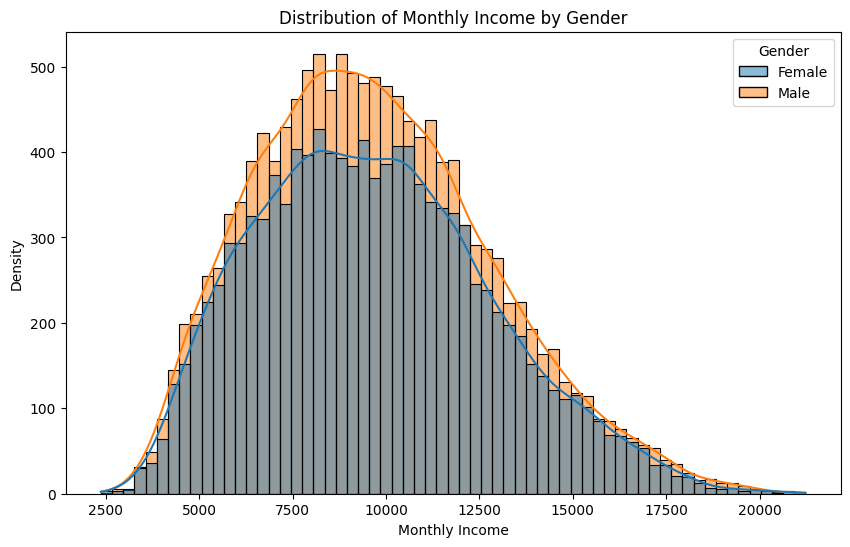

skewness_by_gender:Gender
Female    0.402633
Male      0.429467
Name: Monthly Income, dtype: float64


In [64]:
#  Plot histograms with KDE (Kernel Density Estimate) overlays for the monthly income of males and females.
plt.figure(figsize=(10, 6))
# Map numerical values in 'Gender' to custom text labels
employee_attrition_df['Gender'] = employee_attrition_df['Gender'].replace({1: 'Male', 0: 'Female'})
employee_attrition_df.info()
#sns.histplot(data=employee_attrition_df, x='Monthly Income', hue='Gender', kde=True
sns.histplot(data=employee_attrition_df, x='Monthly Income', hue='Gender', kde=True)
plt.title("Distribution of Monthly Income by Gender")
plt.xlabel("Monthly Income")
plt.ylabel("Density")
#plt.legend(title='Gender')
plt.show()


#  Compute  skewness of the monthly income distribution separately for males and females.
skewness_by_gender = employee_attrition_df.groupby('Gender')['Monthly Income'].skew()
print(f"skewness_by_gender:{skewness_by_gender}")



We have more records for male vs female in our dataset. Distribution of their salares and skewness seems to be similar.
Looking at the Skewness the Female salary is closer to Zero , could be considered as more right Skewed than Males.


mean_income_by_attrition_and_gender:Attrition  Gender
0          Female    9811.559089
           Male      9823.399001
1          Female    9564.937362
           Male      9522.334898
Name: Monthly Income, dtype: float64


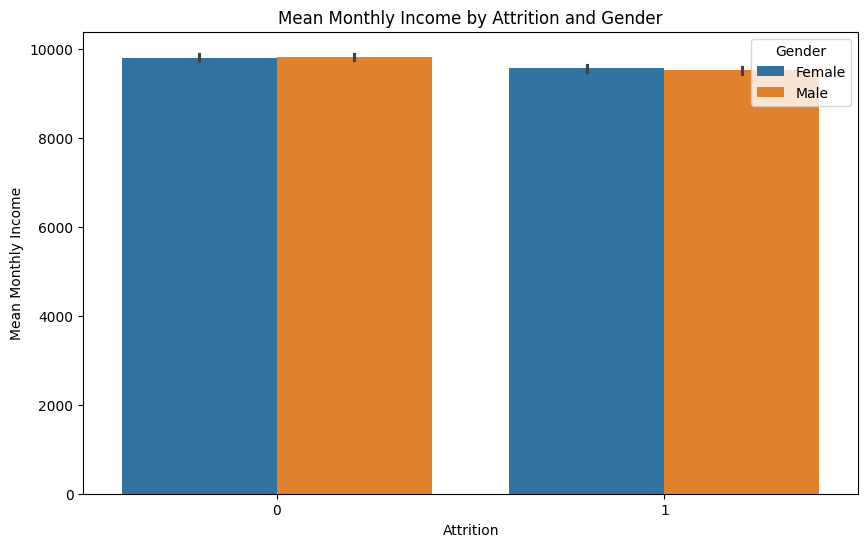

In [65]:
# Calculate the average monthly income by attrition status and gender.
mean_income_by_attrition_and_gender = employee_attrition_df.groupby(['Attrition', 'Gender'])['Monthly Income'].mean()
print(f"mean_income_by_attrition_and_gender:{mean_income_by_attrition_and_gender}")

# Plot the mean monthly income for males and females, comparing those who stayed versus those who left.
plt.figure(figsize=(10, 6))
sns.barplot(x='Attrition', y='Monthly Income', hue='Gender', data=employee_attrition_df)
plt.title("Mean Monthly Income by Attrition and Gender")
plt.xlabel("Attrition")
plt.ylabel("Mean Monthly Income")
# Add count labels on top of each bar
for p in axes.patches:
  axes.annotate(f'{int(p.get_height())}',
  (p.get_x() + p.get_width() / 2., p.get_height()),
  ha='center', va='center', xytext=(0, 9),
  textcoords='offset points', fontsize=10, color='black')

  #rotate the xticks for each subplot
  #axes.set_xticklabels(axes[i].get_xticklabels(), rotation=15)
  axes.tick_params(axis='x', rotation=15)
plt.show()


**average monthly income by attrition status and gender:** Looking at the Bar Graph it is Clear that Females Who left had Average salary little more than Men(May be Age could be the Factor for their decision to Leave). Females who Stayed have Abge salary lesser than Males.

### Bivariate: Attrition and number of dependents - Does the employee decide to leave basis the number of dependents?

In [66]:
# Calculate the total count of employees for each Number of Dependents
count_of_employees_for_each_number_of_dependents = employee_attrition_df['Number of Dependents'].value_counts().reset_index(name='count')
count_of_employees_for_each_number_of_dependents.columns = ['Number of Dependents', 'Total Count']
print(count_of_employees_for_each_number_of_dependents)

# Calculate the count of employees who left for each Number of Dependents
employess_left = employee_attrition_df[employee_attrition_df['Attrition'] == 1]
employees_who_left_for_each_number_of_dependents = employess_left['Number of Dependents'].value_counts().reset_index(name='Left Count')
employees_who_left_for_each_number_of_dependents.columns = ['Number of Dependents', 'Left Count']
print(employees_who_left_for_each_number_of_dependents)

# Calculate the count of employees who stayed for each Number of Dependents
employess_stayed = employee_attrition_df[employee_attrition_df['Attrition'] == 0]
employees_who_stayed_for_each_number_of_dependents = employess_stayed['Number of Dependents'].value_counts().reset_index(name='Stayed Count')
employees_who_stayed_for_each_number_of_dependents.columns = ['Number of Dependents', 'Stayed Count']
print(employees_who_stayed_for_each_number_of_dependents)

# Merge the total counts with attrition counts
attrition_count_for_left = pd.merge(employees_who_left_for_each_number_of_dependents, count_of_employees_for_each_number_of_dependents, how='right',on='Number of Dependents').sort_values(by='Number of Dependents')
attrition_count_for_stayed = pd.merge(employees_who_stayed_for_each_number_of_dependents, count_of_employees_for_each_number_of_dependents, how='right',on='Number of Dependents').sort_values(by='Number of Dependents')

print(attrition_count_for_left)
print(attrition_count_for_stayed)

# see if we have any nulls with Merge funtion above
attrition_count_for_left.isnull().sum()
attrition_count_for_stayed.isnull().sum()

# Fill NaN values in Attrition Count with 0
attrition_count_for_left.fillna(0, inplace=True)
attrition_count_for_stayed.fillna(0, inplace=True)

# Calculate attrition rate
attrition_rate_for_left = (attrition_count_for_left['Left Count'] / attrition_count_for_left['Total Count']) * 100
attrition_rate_for_stayed = (attrition_count_for_stayed['Stayed Count'] / attrition_count_for_stayed['Total Count']) * 100
print("% of Employees Left:")
print(attrition_rate_for_left)
print("\n")
print("% of Employees Stayed:")
print(attrition_rate_for_stayed)
print("\n")

# Plot the attrition rate against number of dependents


   Number of Dependents  Total Count
0                     1         5814
1                     2         5802
2                     0         5737
3                     4         3453
4                     3         3328
5                     6          456
6                     5          410
   Number of Dependents  Left Count
0                     2        3002
1                     1        2912
2                     0        2911
3                     4        1651
4                     3        1631
5                     6         205
6                     5         188
   Number of Dependents  Stayed Count
0                     1          2902
1                     0          2826
2                     2          2800
3                     4          1802
4                     3          1697
5                     6           251
6                     5           222
   Number of Dependents  Left Count  Total Count
2                     0        2911         5737
0             

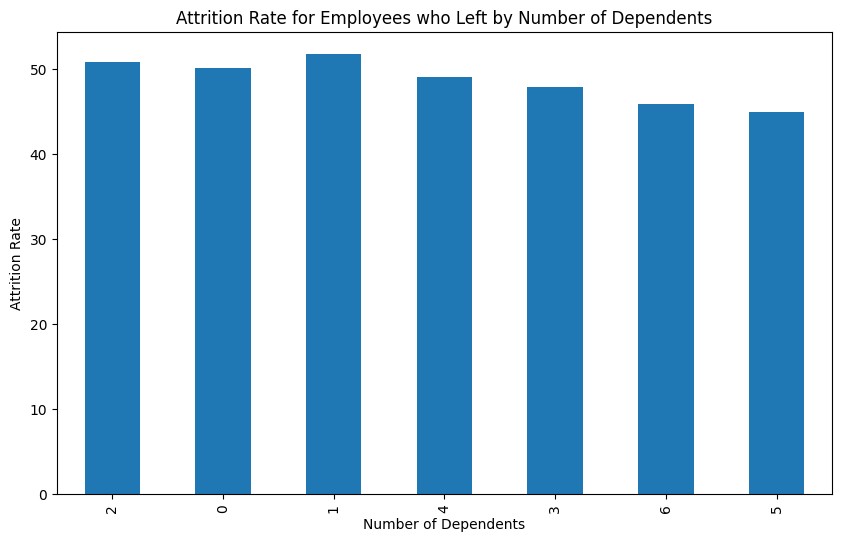

In [67]:
# Plotting the attrition rate for Employees who left against number of dependents
plt.figure(figsize=(10, 6))
axes = attrition_rate_for_left.plot(kind='bar')
plt.xlabel('Number of Dependents')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate for Employees who Left by Number of Dependents')
plt.show()



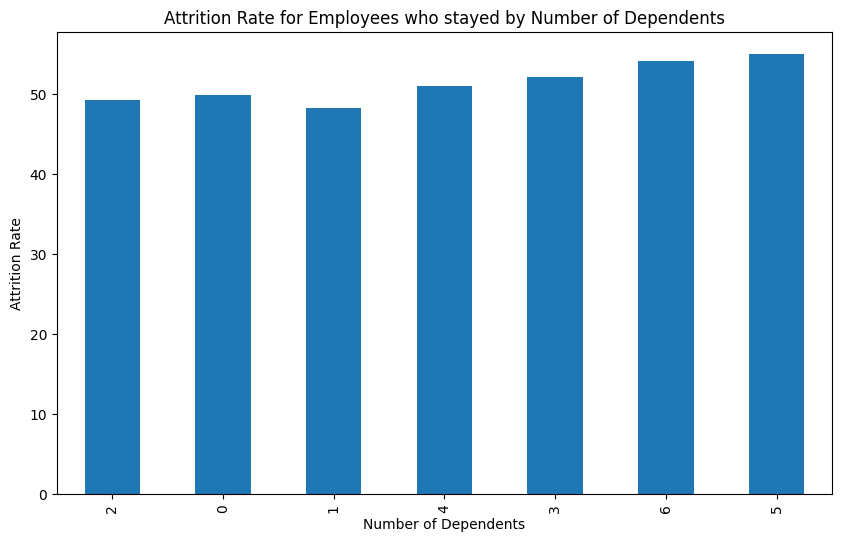

In [68]:
# Plotting the attrition rate for Employees who stayed against number of dependents
plt.figure(figsize=(10, 6))
axes = attrition_rate_for_stayed.plot(kind='bar')
plt.xlabel('Number of Dependents')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate for Employees who stayed by Number of Dependents')
plt.show()

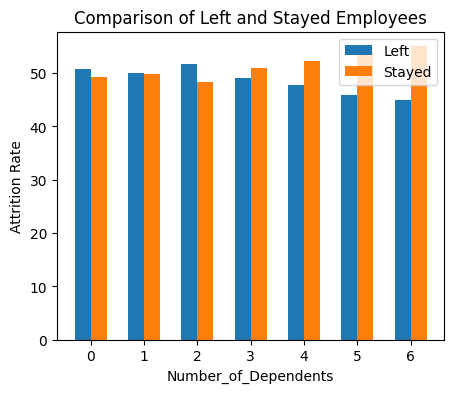

In [69]:
# same barplot for Attrition rate for left and stayed against Number of Dependents
# Define the positions and width for the bars
Number_of_Dependents = [0, 1, 2, 3, 4, 5, 6]
x = np.arange(len(Number_of_Dependents))
width = 0.3  # Width of each bar

fig , ax = plt.subplots(figsize=(5, 4))
bar1 = ax.bar(x - width/2, attrition_rate_for_left, width, label='Left')
bar2 = ax.bar(x + width/2, attrition_rate_for_stayed, width, label='Stayed')

# Add labels and title
ax.set_xlabel('Number_of_Dependents')
ax.set_ylabel('Attrition Rate')
ax.set_title('Comparison of Left and Stayed Employees')
ax.set_xticks(x)
ax.set_xticklabels(Number_of_Dependents)
ax.legend()

# Show plot
plt.show()




**Attrition and number of dependents**From the above Visualization it is Clear that Number of Dependents when less Employees tend more to Leave the Company as compared to Employees who stayed when they are having more depedents.

### Multivariate: Attrition, num of dependents and gender - Is the attrition ratio similar for male/female employees with same number of dependents?

    Gender  Number of Dependents  Total Count
0   Female                     0         2625
1   Female                     1         2628
2   Female                     2         2626
3   Female                     3         1517
4   Female                     4         1598
5   Female                     5          185
6   Female                     6          237
7     Male                     0         3112
8     Male                     1         3186
9     Male                     2         3176
10    Male                     3         1811
11    Male                     4         1855
12    Male                     5          225
13    Male                     6          219
    Gender  Number of Dependents  Left Count
0   Female                     0        1455
1   Female                     1        1477
2   Female                     2        1511
3   Female                     3         833
4   Female                     4         832
5   Female                     5        

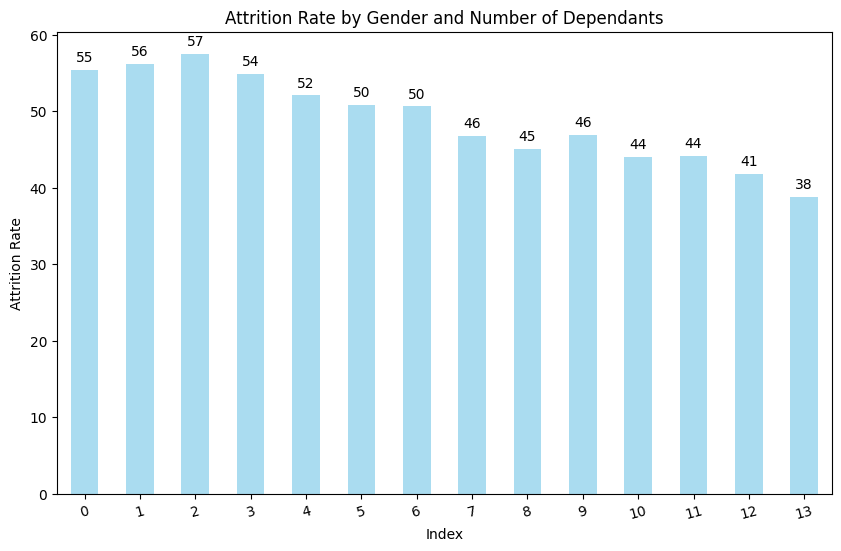

In [70]:
# Calculate the total count of employees for each combination of Gender and Number of Dependents
count_of_employees_for_each_number_of_dependents_and_gender = employee_attrition_df.groupby(['Gender', 'Number of Dependents']).size().reset_index(name='Total Count')
print(count_of_employees_for_each_number_of_dependents_and_gender)

# Calculate the count of employees who left for each combination of Gender and Number of Dependents
employess_left= employee_attrition_df[employee_attrition_df['Attrition'] == 1]
employees_who_left_for_each_number_of_dependents_and_gender = employess_left.groupby(['Gender', 'Number of Dependents']).size().reset_index(name='Left Count')
print(employees_who_left_for_each_number_of_dependents_and_gender)


# Merge the total counts with attrition counts
attrition_count = pd.merge(employees_who_left_for_each_number_of_dependents_and_gender, count_of_employees_for_each_number_of_dependents_and_gender, how= 'right', on=['Gender', 'Number of Dependents'])
print(attrition_count)

# Fill NaN values in Attrition Count with 0
attrition_count.isna().sum()
#got NO miising Values so below fillna step not required.
attrition_count.fillna(0, inplace=True)


# Calculate attrition rate
attrition_rate = (attrition_count['Left Count'] / attrition_count['Total Count']) * 100
print("% of Employees Left:")
print(attrition_rate)
print("\n")


# Plot the attrition rate using bar chart
axes=attrition_rate.plot(kind='bar', color='skyblue', alpha=0.7, figsize=(10, 6))
plt.xlabel('Index')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Gender and Number of Dependants')
for p in axes.patches:
  axes.annotate(f'{int(p.get_height())}',
  (p.get_x() + p.get_width() / 2., p.get_height()),
  ha='center', va='center', xytext=(0, 9),
  textcoords='offset points', fontsize=10, color='black')

  #rotate the xticks for each subplot
  #axes.set_xticklabels(axes[i].get_xticklabels(), rotation=15)
  axes.tick_params(axis='x', rotation=15)

plt.show()




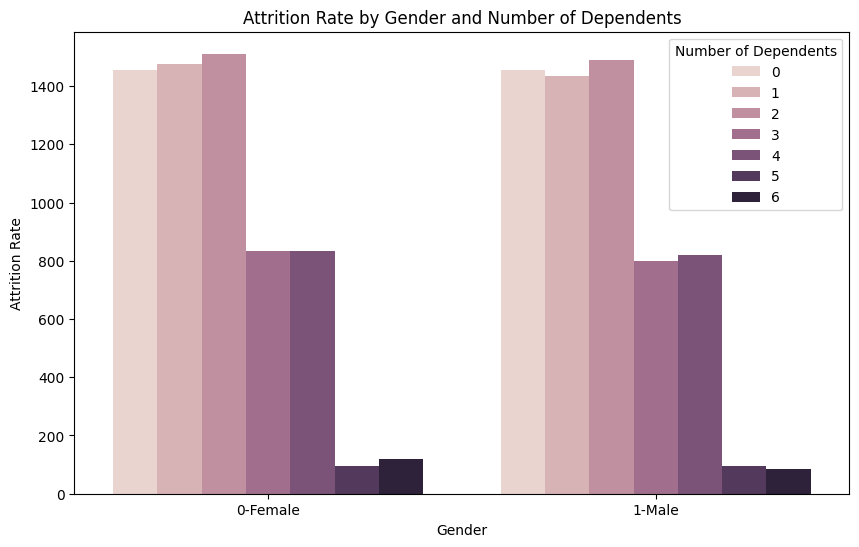

In [ ]:
# - Use a bar plot to compare attrition rates across different numbers of dependents, with separate bars for each gender.
plt.figure(figsize=(10, 6))
Gender = ['0-Female','1-Male']
sns.barplot(x='Gender', y='Left Count', hue='Number of Dependents', data=attrition_count)
plt.title("Attrition Rate by Gender and Number of Dependents")
plt.xlabel("Gender")
plt.xticks(ticks=range(len(Gender)),labels=Gender)
plt.ylabel("Attrition Rate")
plt.show()


**Attrition Rate by Gender and Number of Dependants** We can see that Attrition rate is higher for Employees having 2 Dependants 0, 1, 4, 3 , 5, 6.This shows that more the Dependants the Attrition is less(Employee does not leave the Company) compared to employess having Less Depnendants whoes attrition rate is more.
Attrition rate is more for Employees having Less dependants.
Attiriton rate is less for Employees having More dependants.


**Attrition Rate by Gender and Number of Dependents** Employees who Left
having 0 Dependants, Attrition is almost same for Both the Genders
Employees having > 0 Dependants , In General Attrition rate is more in Females than Males.
Attrition Rate for Females is more where Dependenta are 6.

### **Bivariate: Attrition and company reputation, Attrition and employee recognition**
Do employees leave more if the company reputation is not good? Or do they leave more if employee recognition is low?

Company Reputation
Good         44.874166
Excellent    46.506986
Fair         54.365079
Poor         60.063770
Name: Attrition, dtype: float64


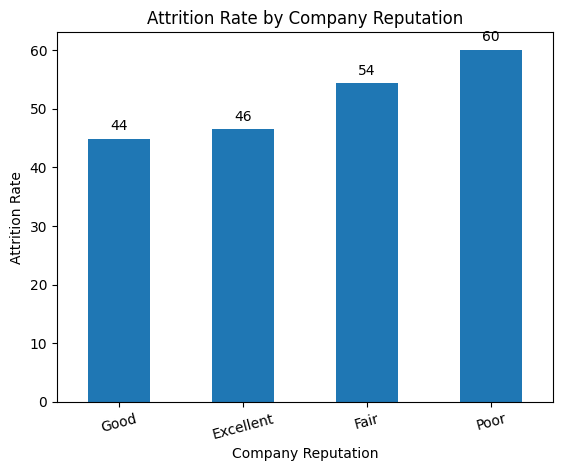

In [71]:
# Analyze attrition rate by company reputation:
# - Calculate the mean attrition rate grouped by 'Company Reputation' and sort the results.

mean_attrition_rate_by_company_reputation = employee_attrition_df.groupby('Company Reputation')['Attrition'].mean().sort_values()
mean_attrition_rate_by_company_reputation
#% of mean_attrition_rate_by_company_reputation
mean_attrition_rate_by_company_reputation = mean_attrition_rate_by_company_reputation * 100
print(mean_attrition_rate_by_company_reputation)

# - Plot a bar chart to visualize the attrition rate across different levels of company reputation.
axes = mean_attrition_rate_by_company_reputation.plot(kind='bar')
plt.xlabel('Company Reputation')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Company Reputation')
for p in axes.patches:
  axes.annotate(f'{int(p.get_height())}',
  (p.get_x() + p.get_width() / 2., p.get_height()),
  ha='center', va='center', xytext=(0, 9),
  textcoords='offset points', fontsize=10, color='black')

  #rotate the xticks for each subplot
  #axes.set_xticklabels(axes[i].get_xticklabels(), rotation=15)
  axes.tick_params(axis='x', rotation=15)

plt.show()

In [ ]:
employee_attrition_df.describe()

ID           Age        Gender  Number of Dependents  \
count  25000.000000  25000.000000  25000.000000          25000.000000   
mean   37158.809080     38.757200      0.543360              1.840000   
std    21515.402487     11.957577      0.498126              1.500003   
min        3.000000     18.000000      0.000000              0.000000   
25%    18497.000000     29.000000      0.000000              1.000000   
50%    37228.500000     39.000000      1.000000              2.000000   
75%    55952.250000     49.000000      1.000000              3.000000   
max    74497.000000     59.000000      1.000000              6.000000   

       Months at Company  Monthly Income  Number of Promotions  \
count       25000.000000    25000.000000          25000.000000   
mean           26.300520     9681.227760              0.476760   
std            21.494681     3125.775771              0.754164   
min             1.000000     2374.000000              0.000000   
25%             9.000000     7326.000000              0.000000   
50%            21.000000     9443.500000              0.000000   
75%            39.000000    11726.000000              1.000000   
max           120.000000    21221.000000              4.000000   

       Total experience   Remote Work    Attrition  
count      25000.000000  25000.000000  25000.00000  
mean          52.634680      0.498040      0.50000  
std           26.796078      0.500006      0.50001  
min            1.000000      0.000000      0.00000  
25%           31.000000      0.000000      0.00000  
50%           52.000000      0.000000      0.50000  
75%           74.000000      1.000000      1.00000  
max          126.000000      1.000000      1.00000

Number of Promotions
3    26.342711
4    27.397260
2    45.546218
1    49.894626
0    51.342486
Name: Attrition, dtype: float64


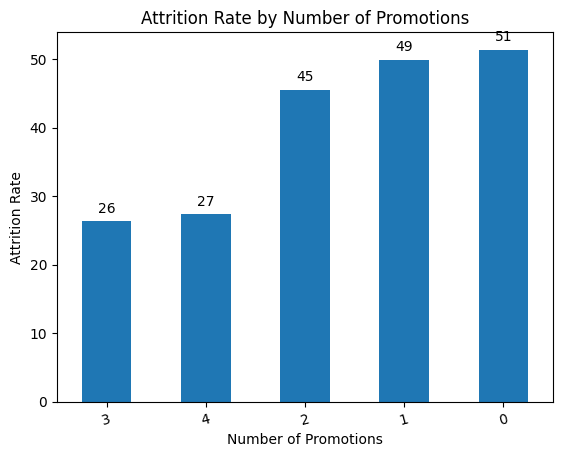

In [72]:
#Analyze attrition rate by Employee recognition or Number of Promotions
# - Calculate the mean attrition rate grouped by 'Number of Promotions' and sort the results.
mean_attrition_rate_by_number_of_promotions = employee_attrition_df.groupby('Number of Promotions')['Attrition'].mean().sort_values()
mean_attrition_rate_by_number_of_promotions

#% of mean_attrition_rate_by_number_of_promotions
mean_attrition_rate_by_number_of_promotions = mean_attrition_rate_by_number_of_promotions * 100
print(mean_attrition_rate_by_number_of_promotions)

# - Plot a bar chart to visualize the attrition rate across Number of Promotions
axes = mean_attrition_rate_by_number_of_promotions.plot(kind='bar')
plt.xlabel('Number of Promotions')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Number of Promotions')
for p in axes.patches:
  axes.annotate(f'{int(p.get_height())}',
  (p.get_x() + p.get_width() / 2., p.get_height()),
  ha='center', va='center', xytext=(0, 9),
  textcoords='offset points', fontsize=10, color='black')

  #rotate the xticks for each subplot
  #axes.set_xticklabels(axes[i].get_xticklabels(), rotation=15)
  axes.tick_params(axis='x', rotation=15)

plt.show()

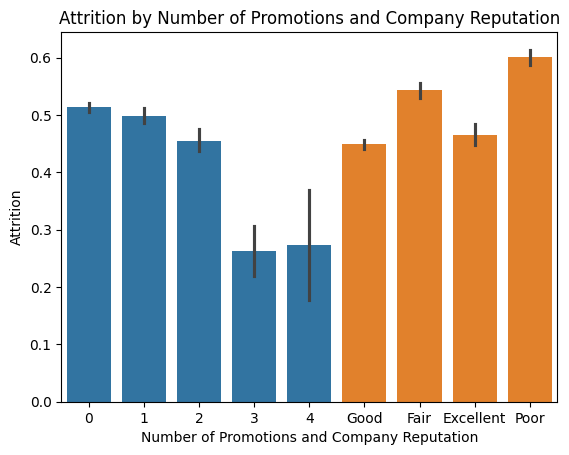

In [73]:
# combined Bar Plot for Number if Promotions and Company Reputation
sns.barplot(x='Number of Promotions', y='Attrition', data=employee_attrition_df)
sns.barplot(x='Company Reputation', y='Attrition', data=employee_attrition_df)
plt.xlabel('Number of Promotions and Company Reputation')
plt.ylabel('Attrition')
plt.title('Attrition by Number of Promotions and Company Reputation')
plt.show()

**Do employees leave more if the company reputation is not good? Or do they leave more if employee recognition is low?** Above Analysis shows us that Employees leave more when the company reputation is not Good compared to the Employee getting No Promotions at all.


### **Bivariate: Worklife balance across Industries** - Does the work-life balance change across different industries?

Industry    Work-Life Balance
Education   High                 0.340400
            Very High            0.308200
            Fair                 0.179000
            Poor                 0.172400
Finance     Poor                 0.338000
            Fair                 0.323000
            High                 0.173750
            Very High            0.165250
Healthcare  Fair                 0.263467
            Poor                 0.248267
            Very High            0.244800
            High                 0.243467
Media       Fair                 0.277200
            Poor                 0.271000
            High                 0.227000
            Very High            0.224800
Technology  Poor                 0.325517
            Fair                 0.322483
            High                 0.182483
            Very High            0.169517
Name: proportion, dtype: float64


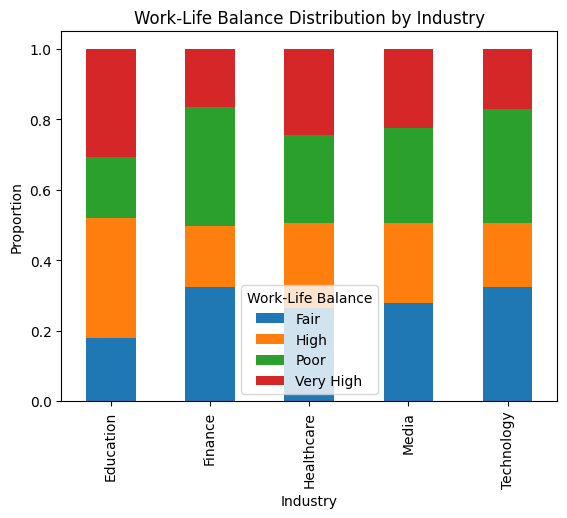

Work-Life Balance
Fair         52.833744
High         46.601942
Poor         52.040816
Very High    47.451124
Name: Attrition, dtype: float64


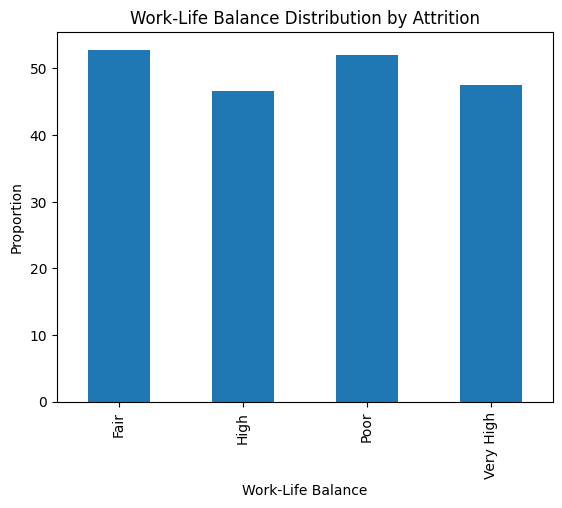

In [74]:
# Analyze work-life balance distribution by industry:
# - Calculate the proportion of each work-life balance level within each industry.
work_life_balance_by_industry = employee_attrition_df.groupby('Industry')['Work-Life Balance'].value_counts(normalize=True)
print(work_life_balance_by_industry)

# - Plot a stacked bar chart to visualize the work-life balance distribution across different industries.
axes = work_life_balance_by_industry.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Industry')
plt.ylabel('Proportion')
plt.title('Work-Life Balance Distribution by Industry')
plt.show()

# work Life Balance against Attrition
work_life_balance_by_attrition = employee_attrition_df.groupby(['Work-Life Balance'])['Attrition'].mean()
#% of work_life_balance_by_attrition
work_life_balance_by_attrition = work_life_balance_by_attrition * 100
print(work_life_balance_by_attrition)
# - Plot a stacked bar chart to visualize the work-life balance distribution across Attrition

axes = work_life_balance_by_attrition.plot(kind='bar',stacked=True)
plt.xlabel('Work-Life Balance',)
plt.ylabel('Proportion')
plt.title('Work-Life Balance Distribution by Attrition')
plt.show()


**Worklife balance across Industries:** From the Above Graph it is clear that Work Life Balance is Pretty Good in Education as Industry compared to Other Industries.

### **Bivariate: Number of promotions across job roles** - Is there any perticular job role which has high occurances of promotion?

Industry
Education     0.498600
Finance       0.479000
Technology    0.477655
Healthcare    0.471467
Media         0.455800
Name: Number of Promotions, dtype: float64
Industry
Education     49.860000
Finance       47.900000
Technology    47.765517
Healthcare    47.146667
Media         45.580000
Name: Number of Promotions, dtype: float64


Text(0.5, 1.0, 'Mean Number of Promotions by Industry')

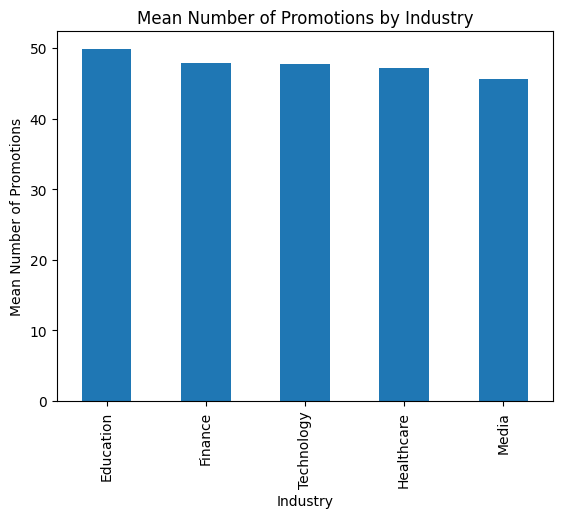

In [75]:
# Analyze the average number of promotions by industry:
# - Calculate the mean number of promotions for each industry and sort the results.
mean_promotions_by_industry = employee_attrition_df.groupby('Industry')['Number of Promotions'].mean().sort_values(ascending=False)
print(mean_promotions_by_industry)
# % of number of promotions for each industry
mean_promotions_by_industry = mean_promotions_by_industry * 100
print(mean_promotions_by_industry)
# - Plot a bar chart to visualize the average number of promotions across different industries
axes = mean_promotions_by_industry.plot(kind='bar')
plt.xlabel('Industry')
plt.ylabel('Mean Number of Promotions')
plt.title('Mean Number of Promotions by Industry')

**average number of promotions across different industries:** Education is the Industry  where we get High Number of Promotions

### **Bivariate: Company size and attrition** - Do employees leave the job more, if the company size is small?

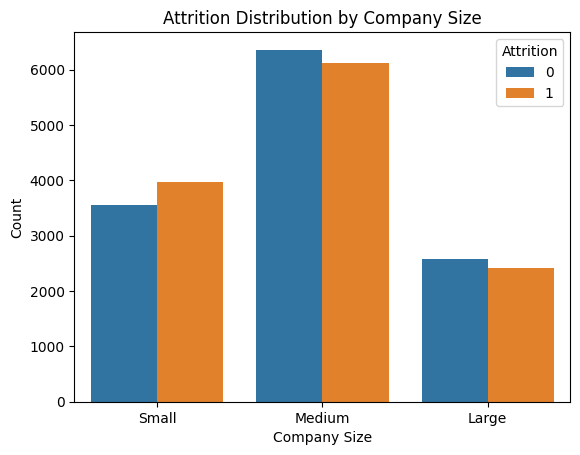

In [76]:
# - Use a count plot to compare the distribution of attrition across different company sizes.
sns.countplot(x='Company Size', hue='Attrition', data=employee_attrition_df)
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.title('Attrition Distribution by Company Size')
plt.show()


**Observation:** In large and medium companies the attrition seems to be less compared to Smaller Companies.
The Medium Company is having more Number of Employees but the More Employees Stayed versus Employees who left.
In Small Companies the Attrition seems to be more , More Employees left versus Employees who Stayed.

### **Bivariate:** What is the mean/median total experience of employees who left vs who stayed?

**Analyze total experience distribution of employees who left**

mean_employees_who_left:Attrition
1.0    51.054
Name: Total experience, dtype: float64
median_employees_who_left:Attrition
1.0    50.0
Name: Total experience, dtype: float64


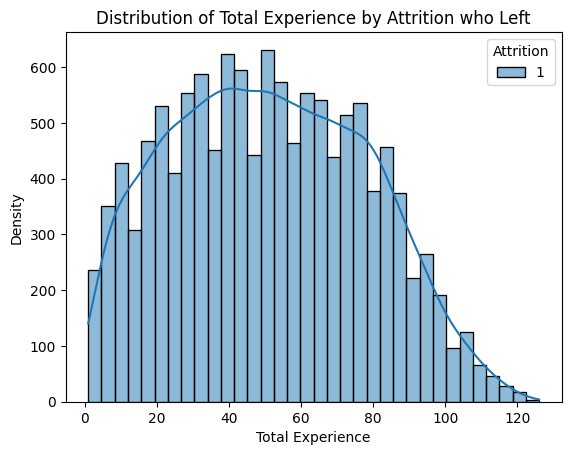

count    mean        std  min   25%   50%   75%    max
Attrition                                                          
1          12500.0  51.054  26.971247  1.0  29.0  50.0  72.0  126.0

In [77]:
# - Use a histogram with a KDE overlay to show the distribution of 'Total experience' for employees who left.


employees_who_left= employee_attrition_df[employee_attrition_df['Attrition'] == 1]
mean_employees_who_left= employee_attrition_df.groupby(employees_who_left['Attrition'])['Total experience'].mean()
median_employees_who_left = employee_attrition_df.groupby(employees_who_left['Attrition'])['Total experience'].median()
print(f"mean_employees_who_left:{mean_employees_who_left}")
print(f"median_employees_who_left:{median_employees_who_left}")

# - Use a histogram with a KDE overlay to show the distribution of 'Total experience' for employees who left.
sns.histplot(data=employees_who_left, x='Total experience', hue='Attrition', kde=True)
plt.title("Distribution of Total Experience by Attrition who Left")
plt.xlabel("Total Experience")
plt.ylabel("Density")
plt.show()

# - Use the describe() method to get a summary of key statistics for the 'Total experience' of employees who left.
employees_who_left.groupby('Attrition')['Total experience'].describe()

**Analyze total experience of employees who did not leave**

mean_employees_who_stayed:Attrition
0.0    54.21536
Name: Total experience, dtype: float64
median_employees_who_stayed:Attrition
0.0    54.0
Name: Total experience, dtype: float64


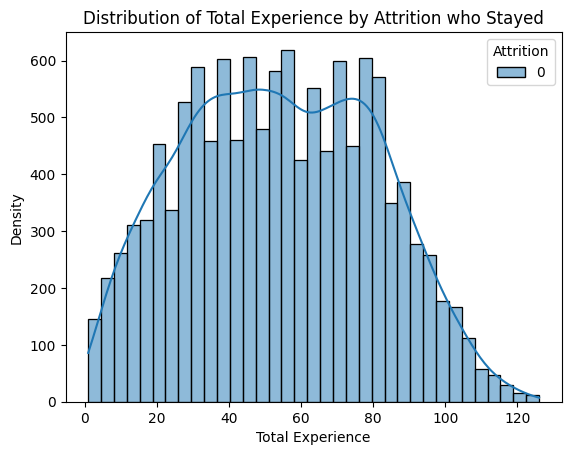

In [78]:
#Use a histogram with a KDE overlay to show the distribution of 'Total experience' for employees who didn't leave.
employees_who_stayed= employee_attrition_df[employee_attrition_df['Attrition'] == 0]
mean_employees_who_stayed= employee_attrition_df.groupby(employees_who_stayed['Attrition'])['Total experience'].mean()
median_employees_who_stayed = employee_attrition_df.groupby(employees_who_stayed['Attrition'])['Total experience'].median()
print(f"mean_employees_who_stayed:{mean_employees_who_stayed}")
print(f"median_employees_who_stayed:{median_employees_who_stayed}")

#Use a histogram with a KDE overlay to show the distribution of 'Total experience' for employees who didn't leave.
sns.histplot(data=employees_who_stayed, x='Total experience', hue='Attrition', kde=True)
plt.title("Distribution of Total Experience by Attrition who Stayed")
plt.xlabel("Total Experience")
plt.ylabel("Density")
plt.show()

# Get a summary of key statistics for the 'Total experience' of employees who stayed.

mean_of total_Exp_who_left:Attrition
0    54.21536
1    51.05400
Name: Total experience, dtype: float64
median_of total_Exp_who_left:Attrition
0    54.0
1    50.0
Name: Total experience, dtype: float64


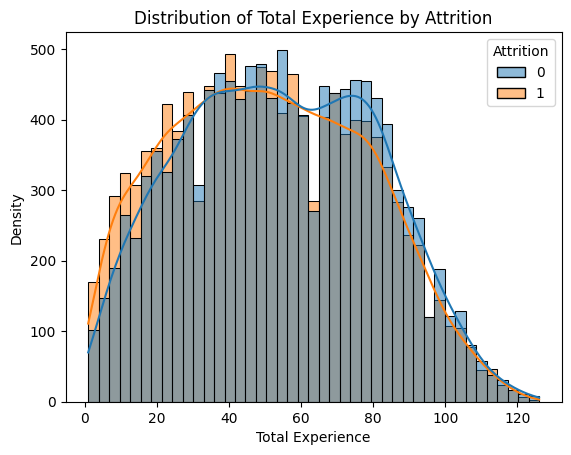

count      mean        std  min   25%   50%   75%    max
Attrition                                                            
0          12500.0  54.21536  26.526804  1.0  33.0  54.0  75.0  126.0
1          12500.0  51.05400  26.971247  1.0  29.0  50.0  72.0  126.0

In [79]:
# Combined Mean and Median by attrition with respect to Total Experience
# - Use a histogram with a KDE overlay to show the distribution of 'Total experience' for employees who left and Stayed.

#employee_attrition_df.columns
mean_of_total_Exp_who_left = employee_attrition_df.groupby('Attrition')['Total experience'].mean()
median_of_total_Exp_who_left = employee_attrition_df.groupby('Attrition')['Total experience'].median()
print(f"mean_of total_Exp_who_left:{mean_of_total_Exp_who_left}")
print(f"median_of total_Exp_who_left:{median_of_total_Exp_who_left}")

# - Use a histogram with a KDE overlay to show the distribution of 'Total experience' for employees who left and Stayed.
sns.histplot(data=employee_attrition_df, x='Total experience', hue='Attrition', kde=True)
plt.title("Distribution of Total Experience by Attrition")
plt.xlabel("Total Experience")
plt.ylabel("Density")
plt.show()
# - Use the describe() method to get a summary of key statistics for the 'Total experience' of employees who left and Stayed.
employee_attrition_df.groupby('Attrition')['Total experience'].describe()

**mean/median total experience of employees who left vs who stayed:** The Mean Total Experience of Employees who left (51.054) is Less compared to the employees who stayed(54.215). Looks Like Employees having less Experience are leaving the company. Though the difference is not much. The Graph for Mean if Total experience of Employees who left seems to be rigth skewed indicating that employees are leaving the company with less experience.

### **Bivariate: Months at company and attrition** - What is the mean/median tenure of employees in that company?

mean_tenure_by_attrition:Attrition
0    27.04008
1    25.56096
Name: Months at Company, dtype: float64
median_tenure_by_attrition:Attrition
0    22.0
1    20.0
Name: Months at Company, dtype: float64


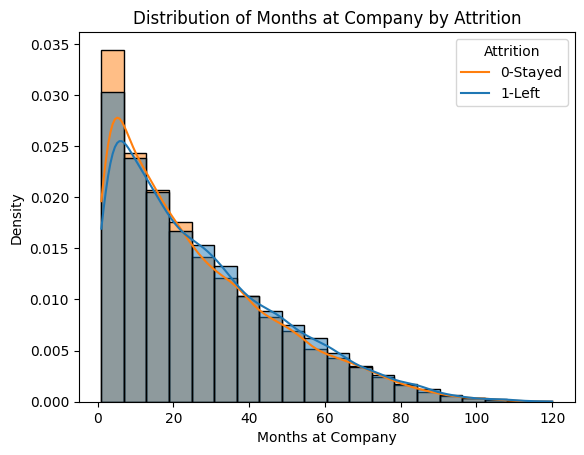

In [80]:
# Analyze the distribution of tenure at the company by attrition status:
# - Use histograms with KDE overlays to compare the distribution of 'Months at Company' for employees who left versus those who stayed.
sns.histplot(data=employee_attrition_df, x='Months at Company', hue='Attrition', kde=True,stat="density", common_norm=False, bins=20)
plt.title("Distribution of Months at Company by Attrition")
plt.xlabel("Months at Company")
plt.legend(title='Attrition', labels=['0-Stayed','1-Left'])
plt.ylabel("Density")

# Calculate and compare the mean and median tenure for employees who left vs. those who stayed:
mean_tenure_by_attrition = employee_attrition_df.groupby('Attrition')['Months at Company'].mean()
median_tenure_by_attrition = employee_attrition_df.groupby('Attrition')['Months at Company'].median()

# - Print the mean and median 'Months at Company' for each attrition group to highlight differences in tenure.
print(f"mean_tenure_by_attrition:{mean_tenure_by_attrition}")
print(f"median_tenure_by_attrition:{median_tenure_by_attrition}")


**What is the mean/median tenure of employees in that company:** Employees Ewho has more months at a company seems to have Stayed compared to employees who is having less Months at a company seems to have left.
mean and median Tenure of Employees who Stayed is more than the Mean and Median Tenure of Employess who Left.


## **Step 4: Probability distributions** [Optional]

**Note**: This section is optional

###  What is the probability of a random employee earning salary more than 10000$ ?

Considering Monthly salary almost follows normal distribution, can we calculate the mean and std. dev. and use cumulative distribution function to get the probability that a randomly selected value is less than or equal to a given value (in this case, $10,000).

Mean Monthly Income: 9681.22776
Standard Deviation of Monthly Income: 3125.7757709298526
Probability of earning less than or equal to $10,000: 0.5406144394351925
Probability of earning over $10,000: 0.4593855605648075


Text(0, 0.5, 'Cumulative Probability')

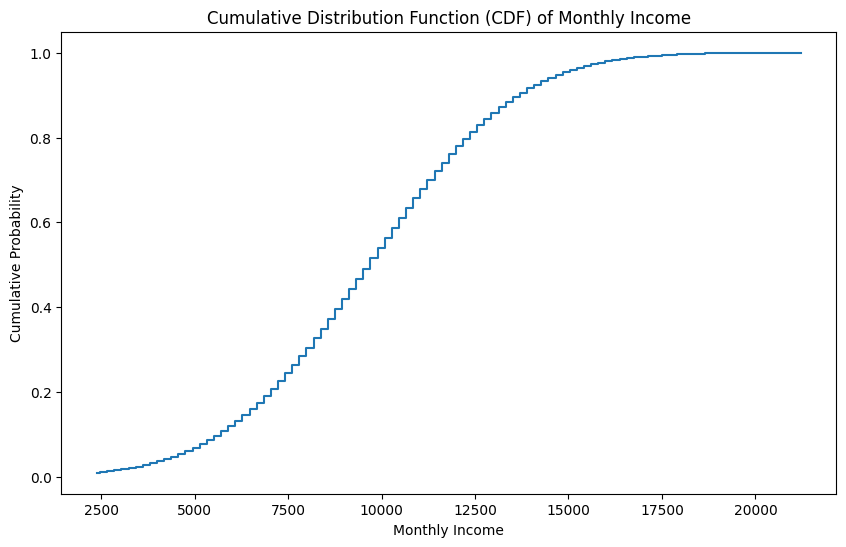

In [81]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
# Fit a normal distribution to 'Monthly Income' and calculate the probability of earning over $10,000.
mean_monthly_income = employee_attrition_df['Monthly Income'].mean()
std_dev_monthly_income = employee_attrition_df['Monthly Income'].std()
print(f"Mean Monthly Income: {mean_monthly_income}")
print(f"Standard Deviation of Monthly Income: {std_dev_monthly_income}")

# probality of Earning Less than or Equal to 10,000$
probability_less_than_10k = stats.norm.cdf(10000, loc=mean_monthly_income, scale=std_dev_monthly_income)
print(f"Probability of earning less than or equal to $10,000: {probability_less_than_10k}")

# Calculate the probability of earning over $10,000.
probability_over_10k = 1 - stats.norm.cdf(10000, loc=mean_monthly_income, scale=std_dev_monthly_income)
print(f"Probability of earning over $10,000: {probability_over_10k}")

# Plotting CDF
x = np.linspace(min(employee_attrition_df['Monthly Income']), max(employee_attrition_df['Monthly Income']), 100)
cdf = stats.norm.cdf(x, loc=mean_monthly_income, scale=std_dev_monthly_income)
plt.figure(figsize=(10, 6))
plt.step(x, cdf, where='mid', label='CDF')
plt.title('Cumulative Distribution Function (CDF) of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Cumulative Probability')

** probability of a random employee earning salary more than 10000$ ** There is a 45.94% Chances that the Person we pick will be Earning More than $10,000 Monthly Income which is less than the  chances  which is 54.06% that person picked is earning less than or Equal to $10,000 MOnthly Income.

## **Step 5: Using auto-EDA packages:** [Optional]

**Note**: This section is optional

Use libraries like pandas-profiling, sweetviz, Dtale, dabl, KLib, etc.

### **Pandas profiling**

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 47.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=61183d38afe448ee91a21b5586828059695091dfa6e0cdf5d89a4270c9ce03e7
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
# Generate an automated EDA report for the dataframe using ydata-profiling.
from ydata_profiling import ProfileReport
profile = ProfileReport(employee_attrition_df, title="Pandas Profiling Report")
#profile.to_file("pandas_profiling_report.html")
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**New observations:** You can document your observations from auto-EDA libraries here.

### **SWEETVIZ**

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



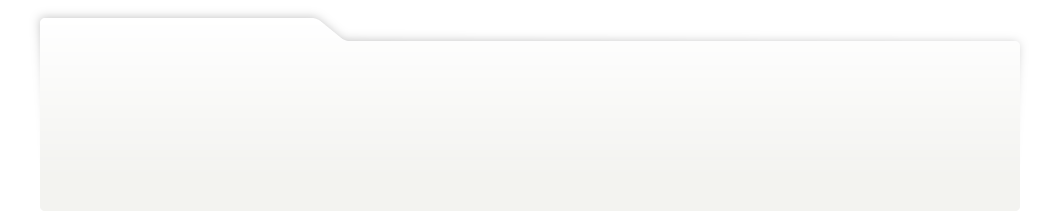
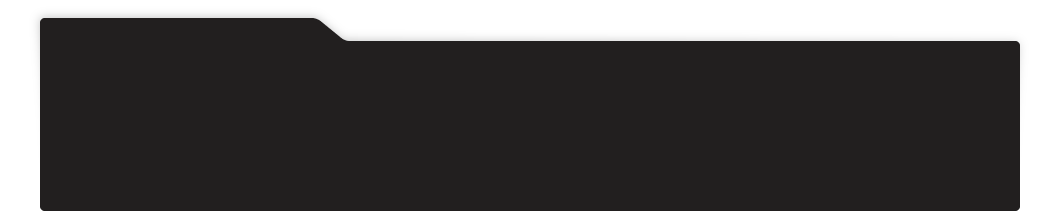
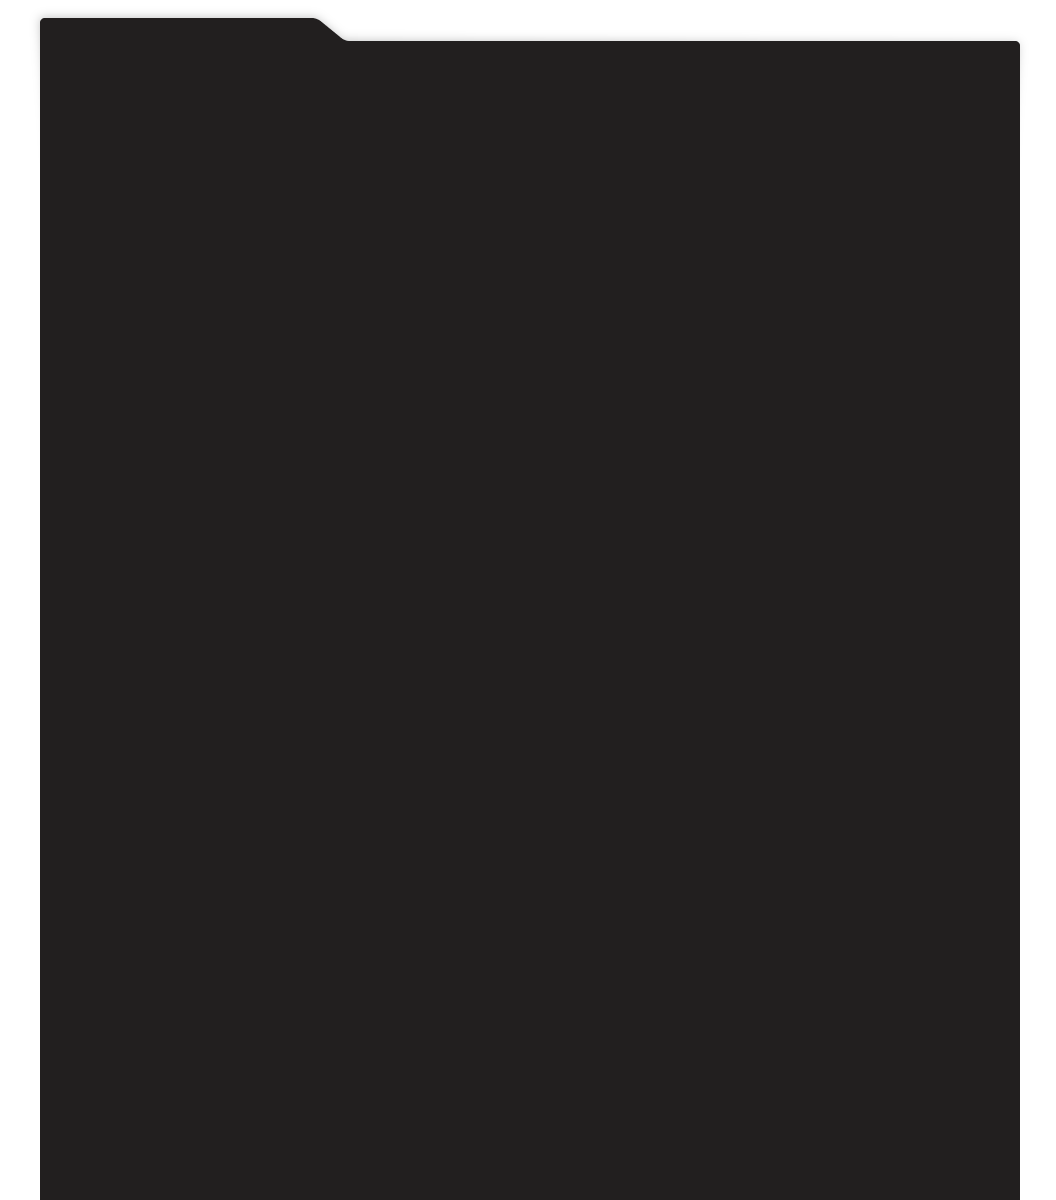
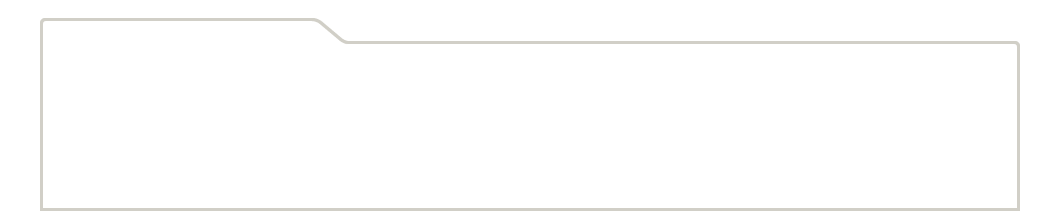
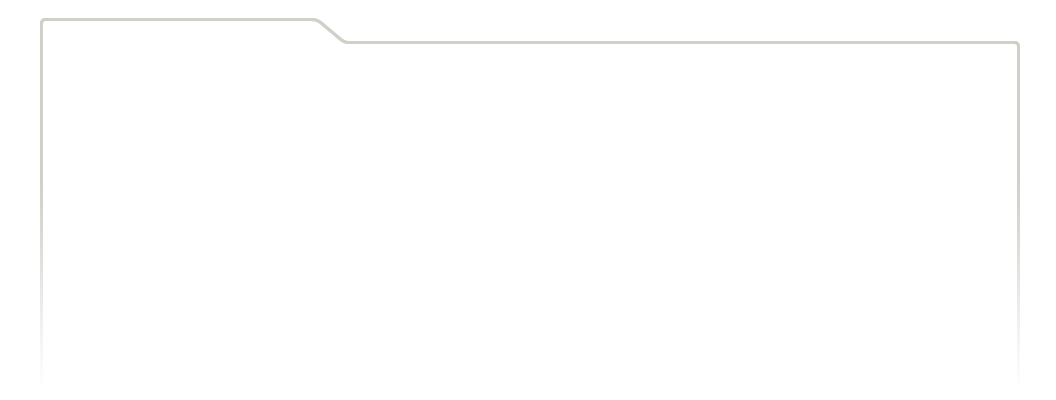
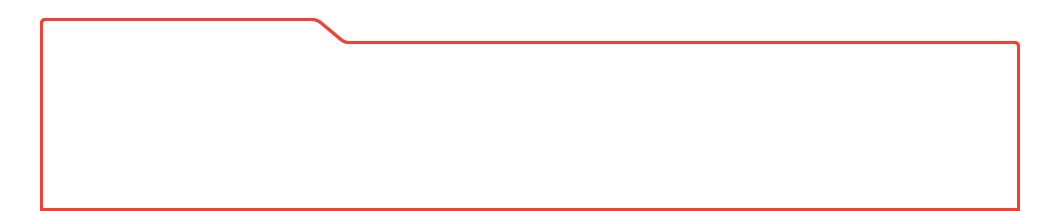
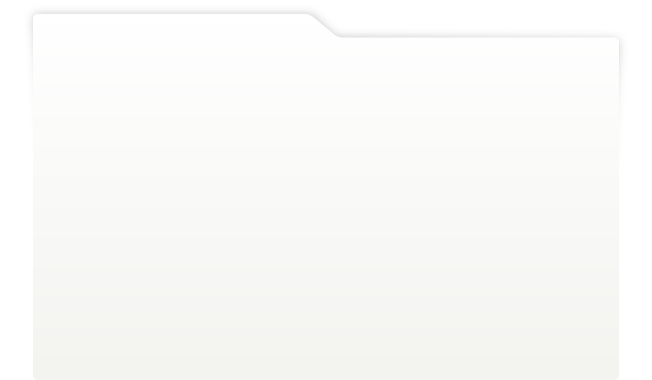
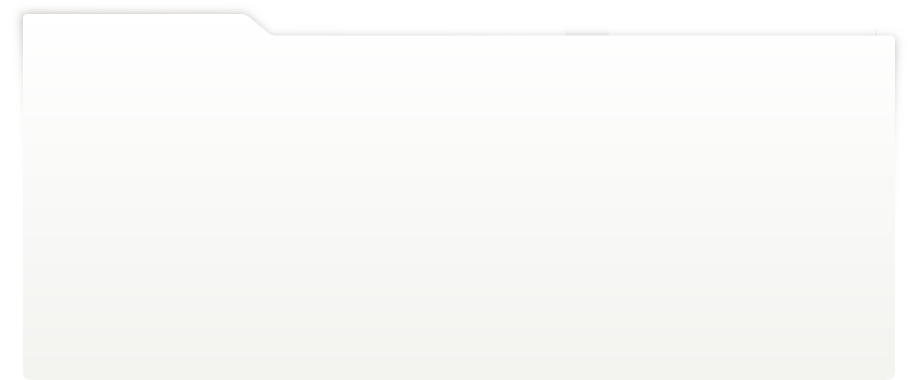
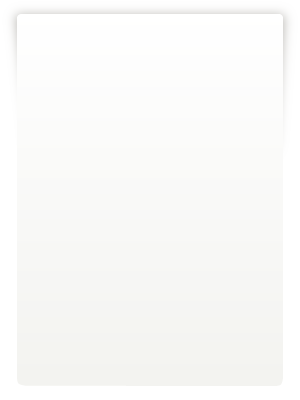
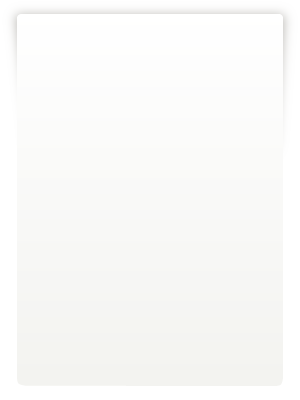
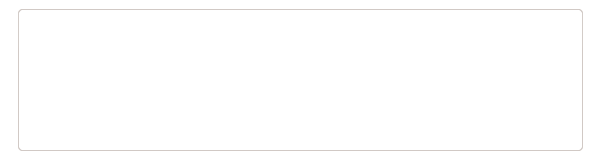
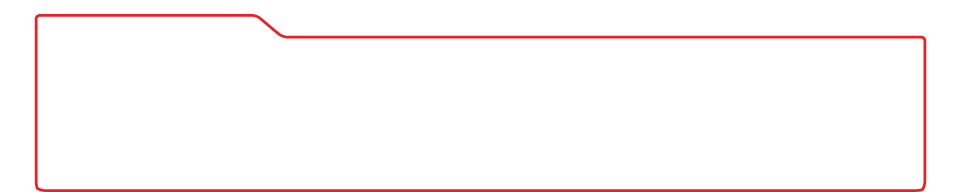
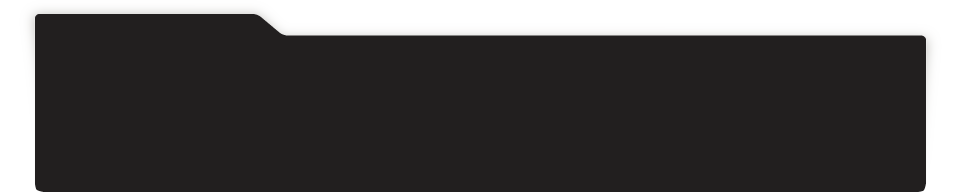
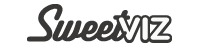
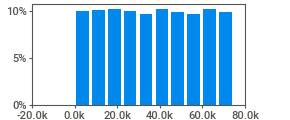
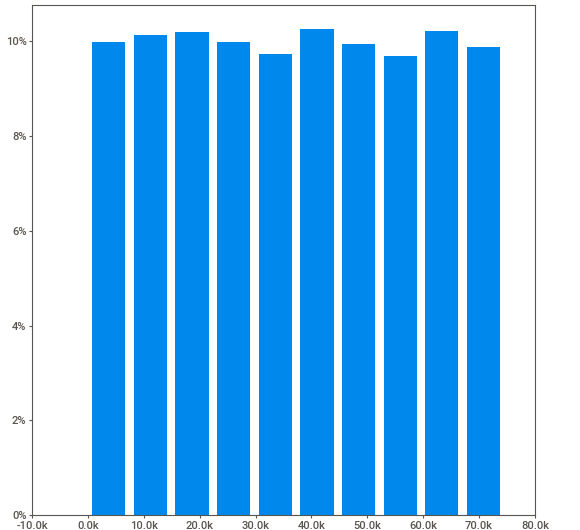
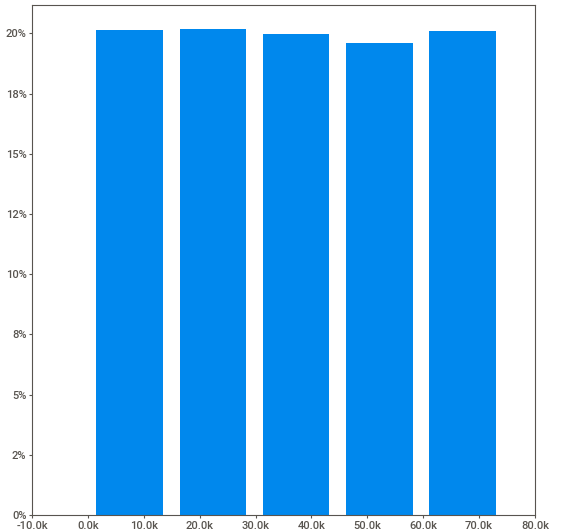
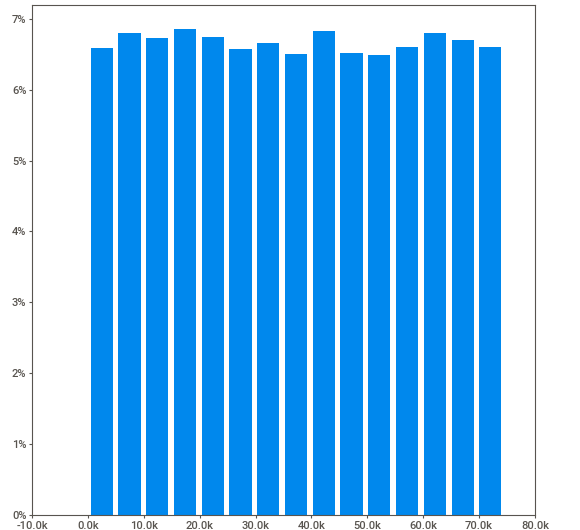
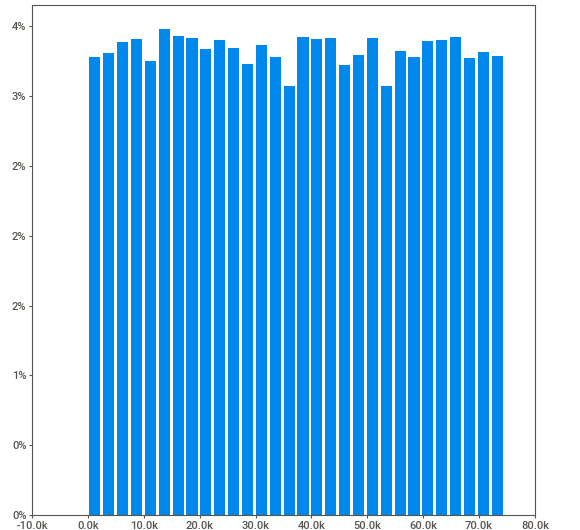
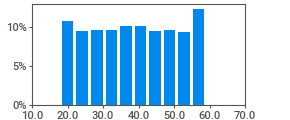
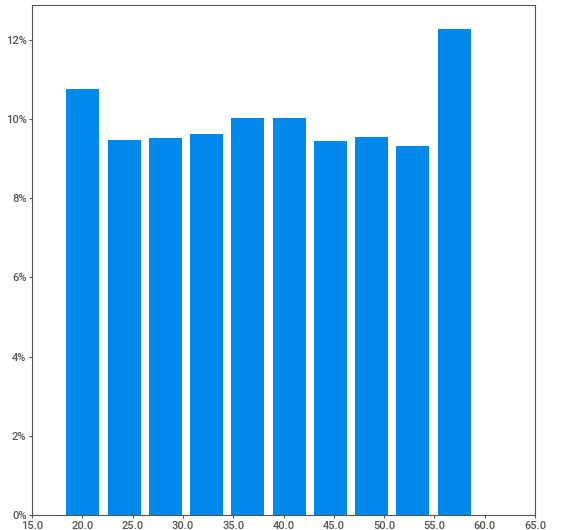
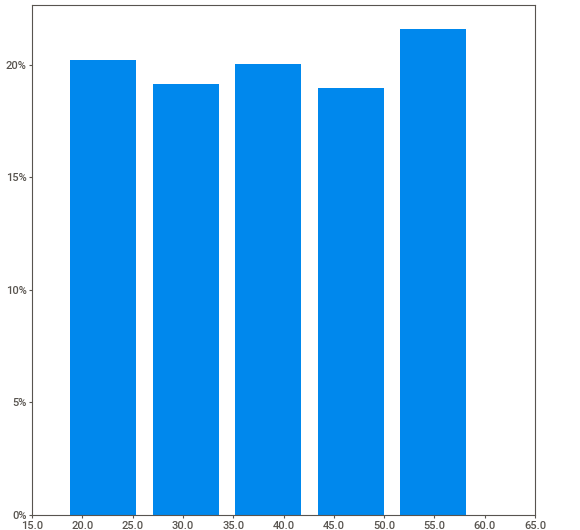
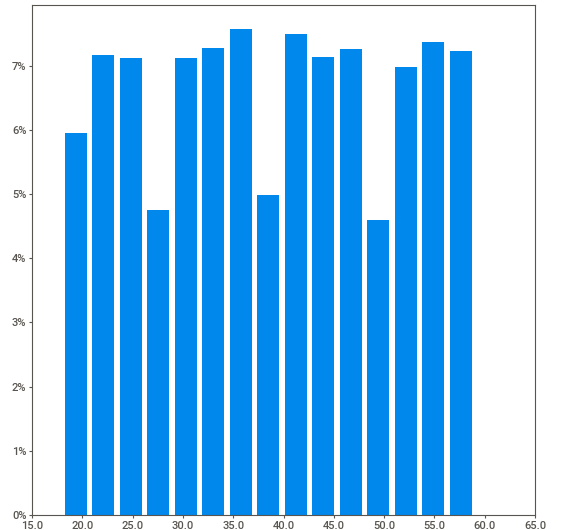
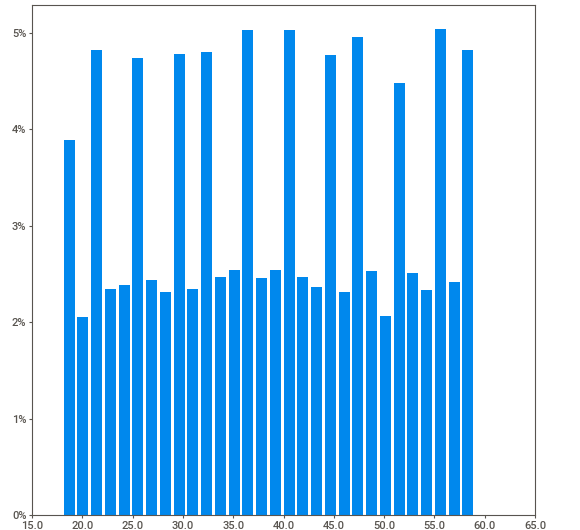
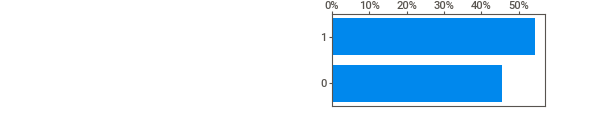
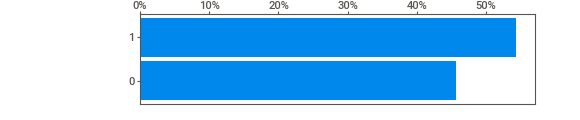
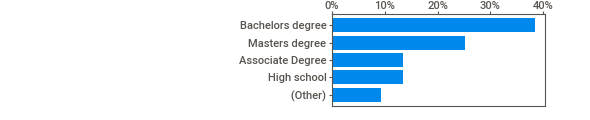
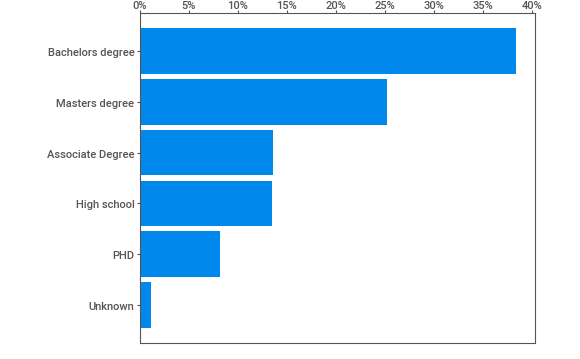
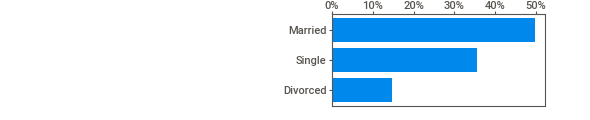
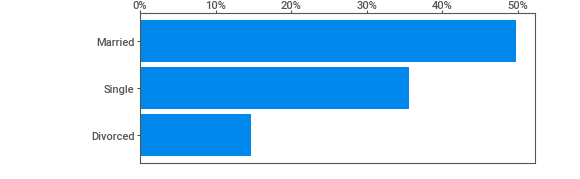
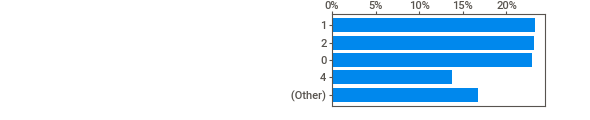
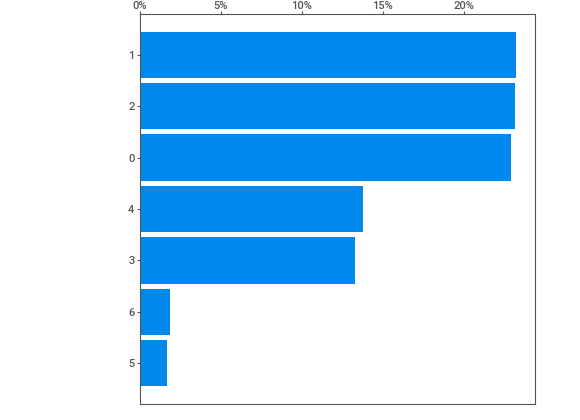
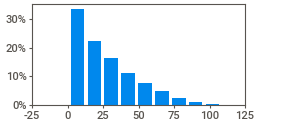
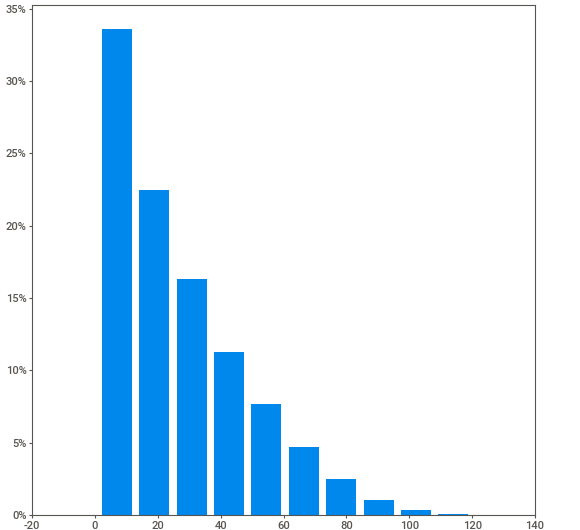
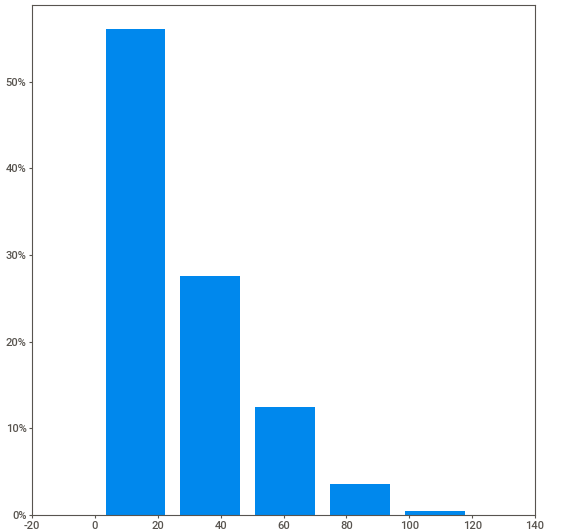
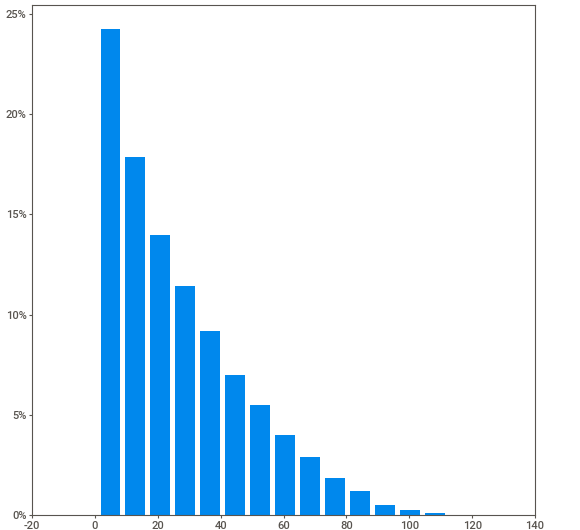
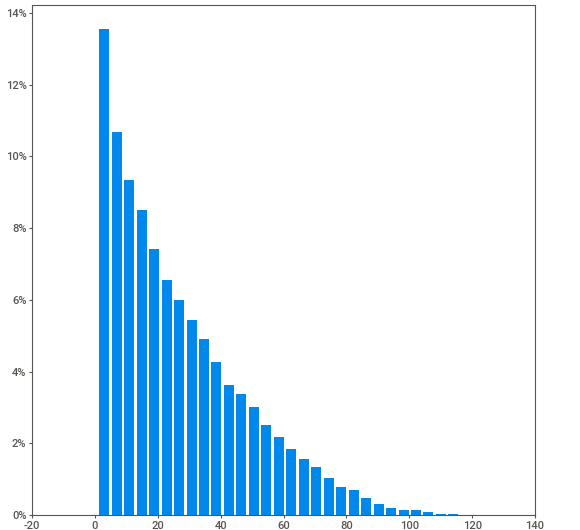
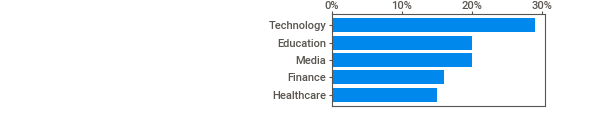
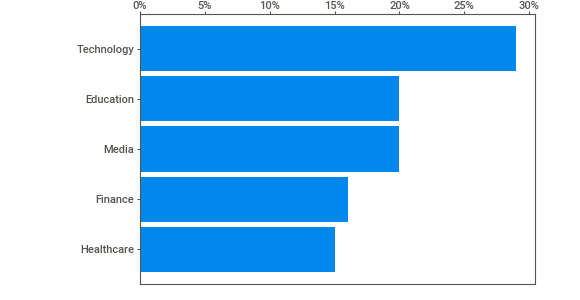
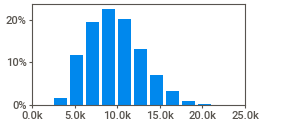
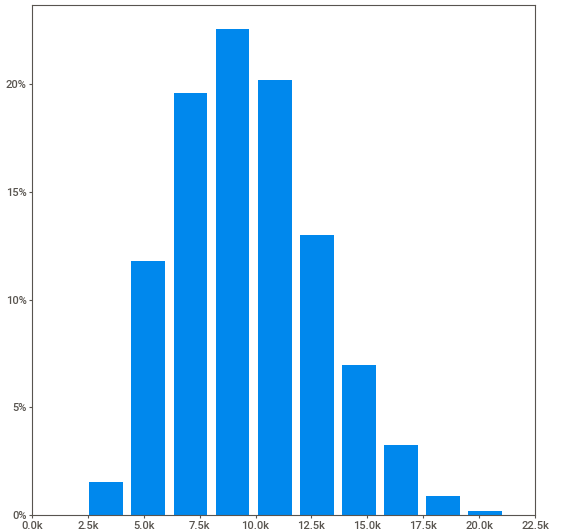
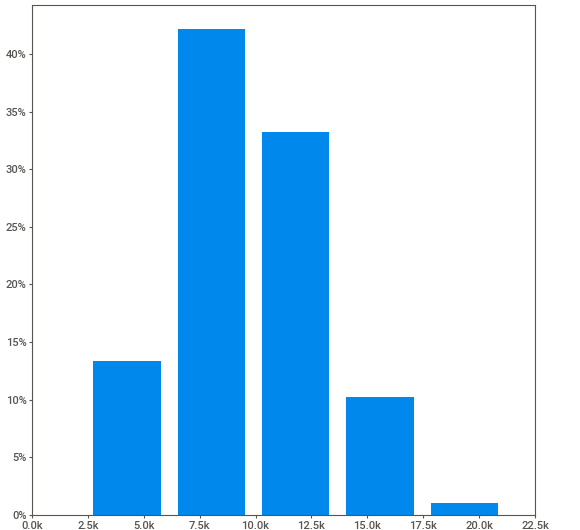
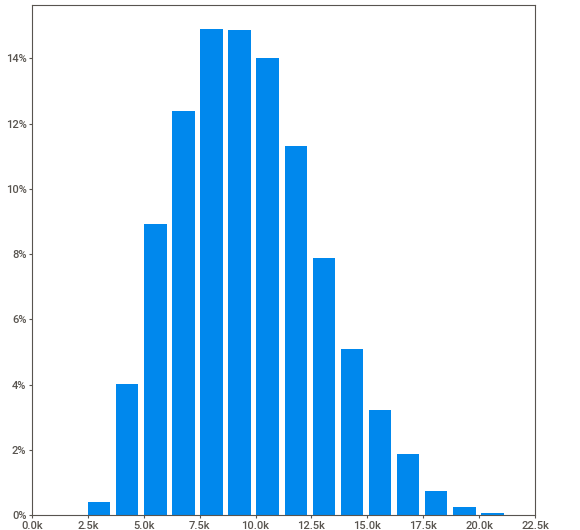
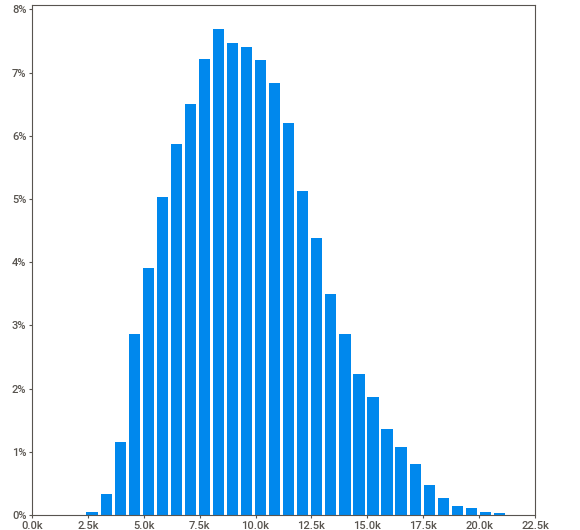
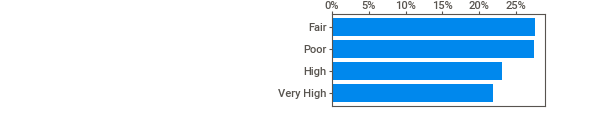
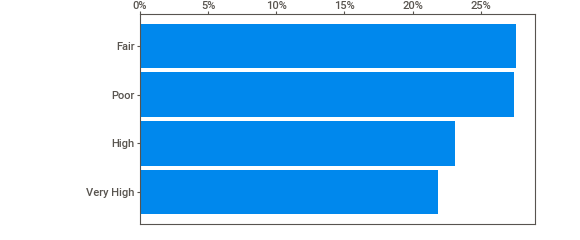
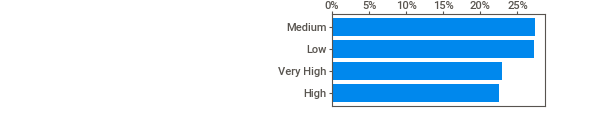
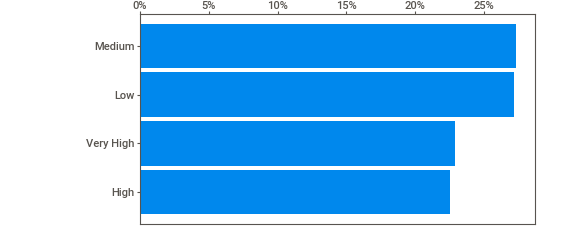
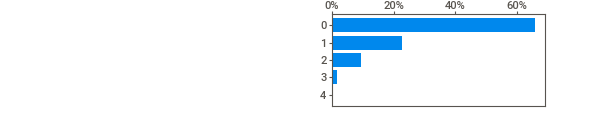
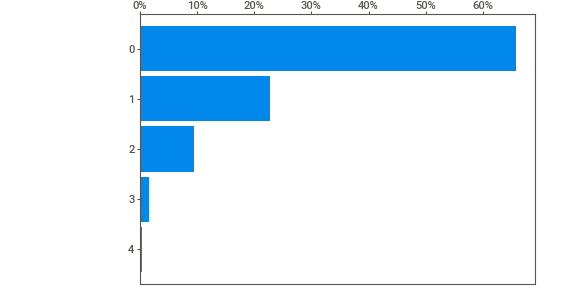
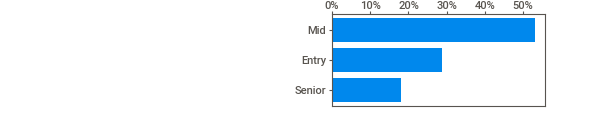
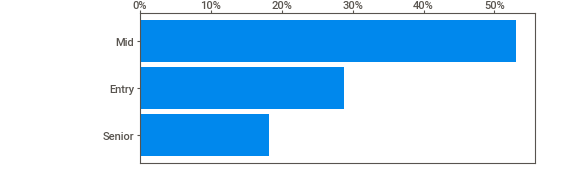
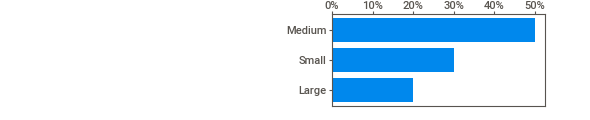
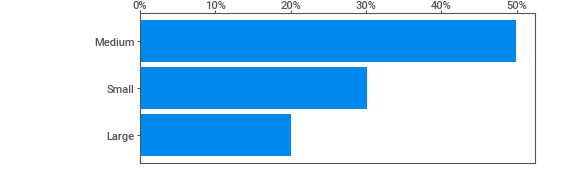
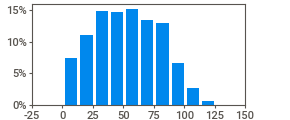
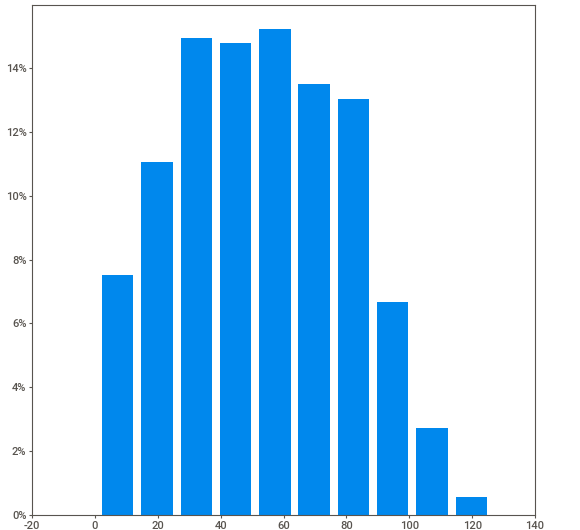
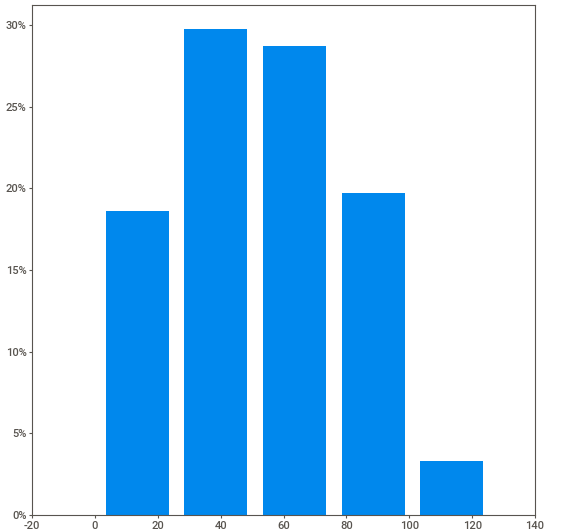
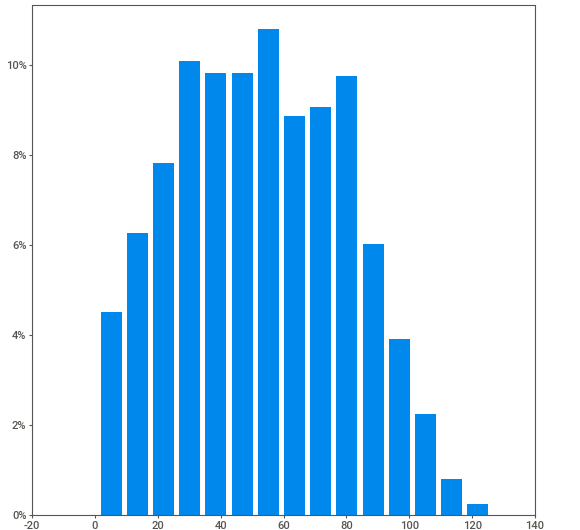
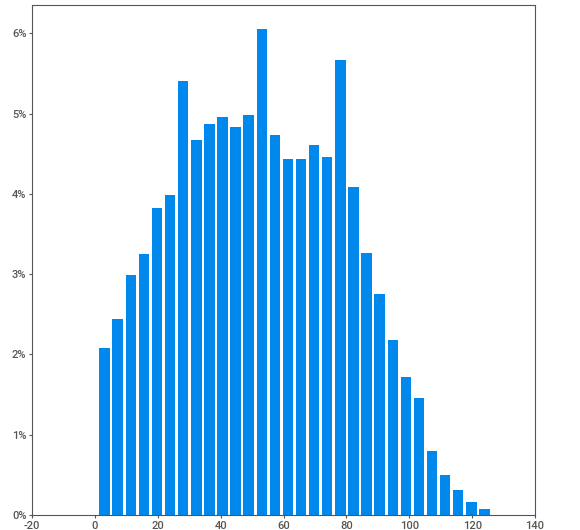
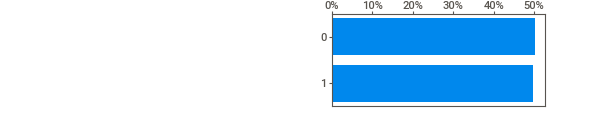
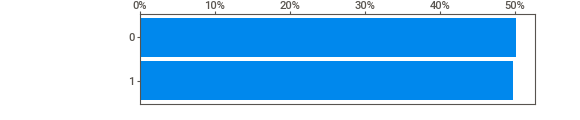
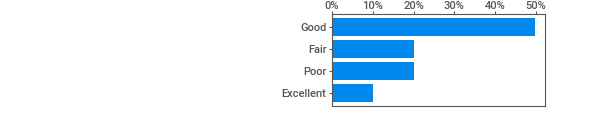
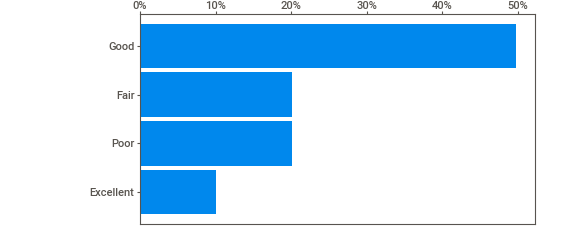
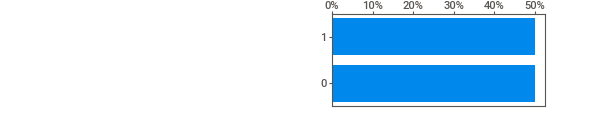
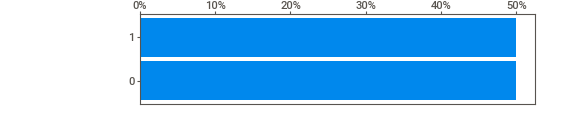
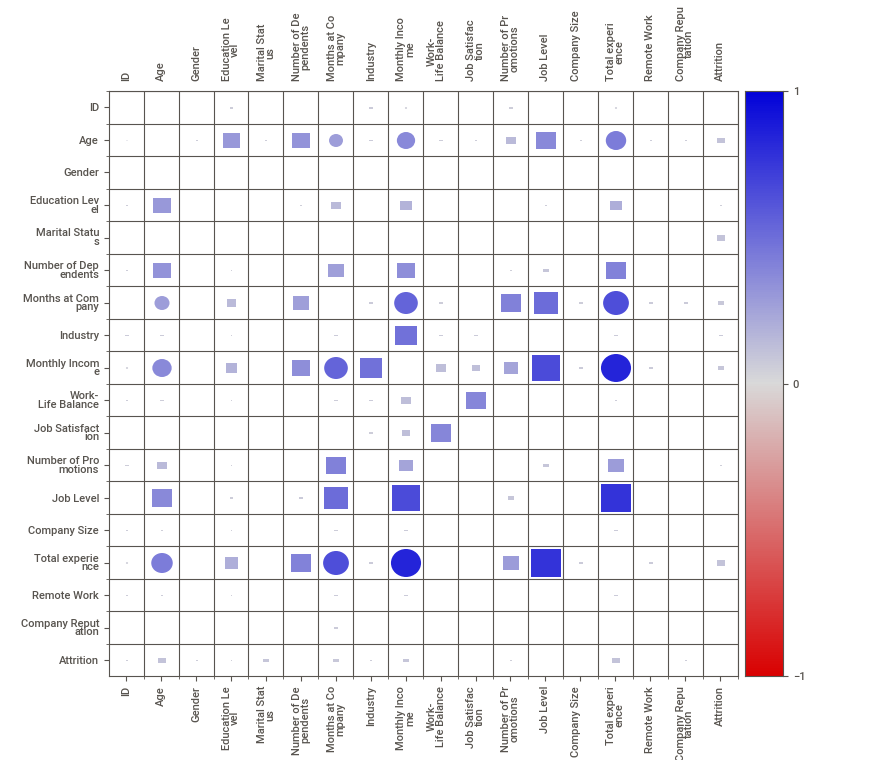
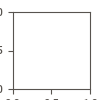

In [ ]:
# Generate an interactive EDA report for the dataframe using Sweetviz.
!pip install sweetviz
from sweetviz import compare
import sweetviz as sv
report = sv.analyze(employee_attrition_df)
report.show_html('report.html')
report.show_notebook()



### DTale

In [ ]:
!pip install dtale

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 62.5 MB/s eta 0:00:00
  Created wheel for dash-colorscales: filename=dash_colorscales-0.0.4-py3-none-any.whl size=62568 sha256=85e0ad7ba501fdb4edfbb9cb52

In [ ]:
# Launch an interactive D-Tale session for exploring the dataframe in a web-based interface
import dtale
d=dtale.show(employee_attrition_df)
d.open_browser()


## **Step 6: Summary : Mention All the Important Observations after doing the complete EDA in below text box**



**Mention your observations here**
**Observations**

*Document your observations for the analysis done till now around missing values, data types, columns*

**Observation 1** - Numerical Data Types
The below Attributes/Columns are Numeric in nature for the Employee_attrition_dataset

ID,
Age,
Number of Dependants,
Months at the Company,
Monthly Income,
Number of Promotions,
Total Experience


**Observation 2** - Categorical Data Types
The below Attributes/Columns are Categorical in nature for the Employee_attrition_dataset

Gender,
Education Level (293 missing values),
Marital Status,
Industry,
Work-Life Balance,
Job Satisfaction,
Overtime,
Job Level,
Company Size,
Remote Work,
Leadership Opportunities (21,820 missing Values),
Company Reputation,
Attrition

**Observation 3** -
out of 20 Attributes/Columns we have only 2 Attributes having missing values that being Education Level and Leadership Oppourtunities

**Observation 4** -
Age
The Maximum Age of the Employee in this dataset is 59 Year old
The Minimum Age of the Employee in this dataset is 18 Year old
Median age is 39 Years and The eman is about 38.7572 .. very close to Median, this attribute looks Good , No Outliers

**Observation 5** -
Number of Dependants
Maximum is 6 meaning Big Family , Minimum is 0 - No Family/dependants Yet

**Observation 6** -
Months at Company
Maximum is 120 months menaing - 10 Years,
Minimum is 1 month - 30 days (not sure whats wrong , curious to Know about the Employees who was there only for 1 month)

**Observation 7** -
Total Experience
Maximum is 126
Minimum is 1

**Observation 8** -
Attrition
The values are Balanced between the Employees who Stayed and Employees who Left the value being 12500

**Observation 9**
Leadership Opportunities -
This Attribute was Dropped as Missing Vlues was very High (87.28%) which is Greater than 25%.

Overtime -
Overtime Attribute was also Dropped as it contained only 1 unique value all with NO  for all 25000 rows.

Education Level -
This Attributte had some inconsistency and 293 Missing values which were replaced by Text "Unknown" instead of zdropping these Rows.

**Observation 10** -
**Gender**- The number of Male(13584)Employees are More than Female(11416),
**Education Level** - Majority Employee's have done Bachelors Degree(9605) followed by Masters Degree(6308), Associate Degree (3384), High School(3361), PHD(2049) and unknown is (293),
**Marital Status** - Married(12445) Employees are comparatively more than Single(8884) and Divorced (3671),
**Industry** - Employees working in Technology (7250) are more than Media(5000) and Education(5000) , Finance(4000) , Healthcare(3750),
**Remote Work** - 12451 Employees were working remotely
and rest 12549 were working onsite.

**Observation 11** -
**Age:** - Is Equally distributed towards the Center - at 39
The Count of Age group 55 to 60 is High around 3000

**Number of Dependants** -
The Employee count for the Number of Dependents 0(5737),1(5814) and 2(5802) is more and equally distributed. The Employee  Count of Number of Dependents 3(3328) and 4 (3453) is mid range. We have less Employees having dependents 5(410) or 6(456).

**Months at Company** -  Looking at the distribution it Looks like right Skewed denoting that Majority of the Employees Spent less time/Months in the company.

**Monthly Income** - This looks almost a Normal Distribution(could be slightly rigth skewed) , Maximum Employees Having Monthly salary in the range of $7,500 to $12,500.

**Number of Promotions** - This distribution looks Rigth Skewed as more Number of Employees got promotions closer to Zero, the count being 0(16462), 1(5694), 2(2380), 3(391), 4(73).

**Total experience** - This distribution looks like having 2 peaks one Between 40 and 50 months of experience and the other being 65 to 75 months of Experience making it look like a Bimodal distribution.

**Observation 12** -
**Bivariate Analysis for Categorical attributes by Attrition** -
**Gender** Attrition in Females is more than Males,
**Education Level** Attrition in Education Level is more for Employees who did High School and Associate and Unknown Education level as comapred to those who Stayed per respective Educaiton Level.
**Marital status** Attrition is more for Employees who are single comapred to Employees who are Married or Divorced
**Industry**  Attrition is more fpr Technologu and Finance Indsutries
**Work-Life Balance** It is as Expected Attrition is more where work life Balance is Poor or Fair.
**Job Satisfaction** Attrition is more where Job Satisfaction is Low or Medium
** Job Level** Attrition is more for Employees who are at Entry Level.
**Company Size** Attrition is more for Small Size Companies
**Remote work** Not Much Impact looks like Attrition is very Low for Employees who are not remote.
**Company reputation** Attrition is more where company Zreputation is Poor and Fair.

**Observation 13** -
**Bivariate Analysis for Numerical attributes by Attrition**
**Age** - Attrition is comaratively very high for Young employees <=28 and then we have high Attrition for employees Aged 30 and 47.

**Observation 14** -
As the scatter Plot Points form an upward trend from left to right (slope up) it indicates a Strong Positive Correlation between **"Months at the Company and "Total Experience"**.

**Observation 15** -
There looks to be a Postive relationship between **Age and Months at the Company**
A large number of data points are concentrated in the lower-left area (young employees with short tenure).As the Age Increases beyond may be 25 the spread becomes more wider for Senior Employees who stayed more than 60 months.

**Observation 16** -
There appears to be a positive trend: as the number of months at the company increases, monthly income tends to rise. The data points are densely packed, showing a gradual increase in income as tenure at the company grows. There is a wide spread of income values at every tenure, indicating variability in income that might depend on other factors.

**Observation 17**
Total experience and income - Looks like a Positive trend as Experience increase the Monthly Income Increases with few Outliers may be Because of the Job Type or Industry.

**Observation 18** - Salary does seem to influence employee attrition. But, we might need to have a closer look at it since the difference is small 2.74% < 5%.

**Observation 19** - We have more records for male vs female in our dataset. Distribution of their salares and skewness seems to be similar. Looking at the Skewness the Female salary is closer to Zero , could be considered as more right Skewed than Males.

**Observation 20** -
Average monthly income by attrition status and gender: Looking at the Bar Graph it is Clear that Females Who left had Average salary little more than Men(May be Age could be the Factor for their decision to Leave). Females who Stayed have Abge salary lesser than Males.

**Observation 21** -
Attrition and number of dependentsFrom the above Visualization it is Clear that Number of Dependents when less Employees tend more to Leave the Company as compared to Employees who stayed when they are having more depedents.

**Observation 22** -
**Attrition Rate by Gender and Number of Dependents** Employees who Left having 0 Dependants, Attrition is almost same for Both the Genders Employees having > 0 Dependants , In General Attrition rate is more in Females than Males. Attrition Rate for Females is more where Dependents are 6.

**Observation 23** -
**Do employees leave more if the company reputation is not good? Or do they leave more if employee recognition is low?** Above Analysis shows us that Employees leave more when the company reputation is not Good (Poor and Fair) compared to the Employee getting No Promotions at all.

**Observation 24** -
Worklife balance across Industries: From the Above Graph it is clear that Work Life Balance is Pretty Good in Education as Industry compared to Other Industries.

**Observation 25** -
Average number of promotions across different industries: Education is the Industry where we get High Number of Promotions

**Observation 26** -
**Attrition by Company Size** - In large and medium companies the attrition seems to be less compared to Smaller Companies. The Medium Company is having more Number of Employees but the More Employees Stayed versus Employees who left. In Small Companies the Attrition seems to be more , More Employees left versus Employees who Stayed.

**Observation 27** -
**Mean/median total experience of employees who left vs who stayed** : The Mean Total Experience of Employees who left (51.054) is Less compared to the employees who stayed(54.215). Looks Like Employees having less Experience are leaving the company. Though the difference is not much. The Graph for Mean if Total experience of Employees who left seems to be rigth skewed indicating that employees are leaving the company with less experience.

**Observation 28** -
**Mean/median tenure of employees in that company:** Employees who has more months at a company seems to have Stayed compared to employees who is having less Months at a company seems to have left.
mean and median Tenure of Employees who Stayed is more than the Mean and Median Tenure of Employess who Left.

**Observation 29** - **BOX PLOT** -
**Age v/s Attrition** -
The plot suggests that age may not have a strong influence on attrition since the distribution is quite similar between the two groups, no outliers can be seen.
**Number of Dependents v/s Attrition** -
The Plot suggests that Numebr of Dependents also may not have a strong Influence the distribution is quite similar between the two groups.No outliers can be seen
**Months at the Company v/s Attrition** -
IQR for both Left and stayed is pretty much similar
The plot says that there are whiskers that Extend upto 80 at the top and upto 1 month at the bottom and there are many outliers beyond 80 months in both groups, indicating some employees have stayed well beyond the typical range. These outliers suggest that a small subset of employees stay much longer than the majority, regardless of whether they ultimately leave or stay.
**Monthly Income** -
IQR income for Employees who Left and stay are very Similar, this also show that we have Whiskers for both left and stayed somewhere around $18,000 and Outliers above that showing that some Employees are being paid more than the usual range but tis appear for Both Left and Stayed , hence this plot suggests monthly income levels are fairly consistent between employees who left and those who stayed, though we can Employees who left have less salary Compared to those who Stayed.







